<a href="https://colab.research.google.com/github/jesusjc4/examples/blob/master/Trabajo_Modulo2_Jesus_Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **FACTORES DE RIESGO CARDIOVASCULAR**

AUTOR: JESÚS CASES HURTADO

TRABAJO FIN DE MÓDULO 2

CURSO: 2022/2023

**APARTADO 1.** Realiza una exploración del conjunto de datos utilizando métodos de la librería Pandas para cargar, filtrar y listar tablas de datos. 


In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 KB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 70.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.3-py3-none-any.whl size=198588 sha256=08004d84d4383893f46548f31b5fb9f93236ca40518848b71c0f66bfbf1ef5f7
  Stored in directory: /root/.cache/pip/wheels/60/1e/21/710be95d0c93ea9ac3c0e6bacd8cce492ad5dd26bf3aedc4bf
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=387588812475b55e98e17c57ec3ccee1e90fed96aaf2437fd74d3807861b92be
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleuti

In [ ]:
#Avoids scrooll-in-the-scroll in the entire Notebook
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript("google.colab.output.setIframeHeight(0,true, {maxHeight:100000000000000000000000})"))
get_ipython().events.register("pre_run_cell", resize_colab_cell)

Se importan las librerías que se van a emplear

In [ ]:
#Tratamiento de datos
#============================================================================
import pandas as pd
import numpy as np

#Gráficos
#=========================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Preprocesado y análisis
#=============================================================================
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

#Configuración matplotlib
#===========================================================================
plt.style.use("ggplot")

#Configuración warnings 
#=============================================================================
import warnings
warnings.filterwarnings("ignore")

#Models
#===============================================================================
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#Metrics & Evaluation
#===========================================================================
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, validation_curve, GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, RobustScaler
from imblearn.over_sampling import SMOTE

#Plotly
#================================================================================
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as figure_factory
import cufflinks as cf
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objs as go
#import plotly.offline as pyo

<IPython.core.display.Javascript object>

In [ ]:
#Cargamos los datos
from google.colab import files
uploaded=files.upload()

<IPython.core.display.Javascript object>

Saving heart_disease.csv to heart_disease.csv


In [ ]:
#Guardamos los datos para poder utilizarlos
import io
df=pd.read_csv(io.BytesIO(uploaded["heart_disease.csv"]))

<IPython.core.display.Javascript object>

Explicación de las variables:

16 características clinicas que tienen relación con las enfermedades cardiovasculares.


*   1) Male: indica Hombre (1) o Mujer (0).
*   2) Age: Float que indica la edad del usuario.
*   3) Education: puede tomar cuatro valores distintos (1,2,3,4).
*   4) CurrentSmoker: 1 si el paciente es fumador, 0 si no lo es.
*   5) CigsPerDay: cantidad de cigarros que se fuma el usuario por día.
*   6) BPMeds: Medición de la presión arterial. Puede tomar dos valores: 1 o 0.
*   7) PrevalentStroke: Si se ha tenido un infarto o más. 1 en caso afirmativo, 0 en caso negativo.
*   8) PrevalentHyp: si el usuario padece hipertensión. 1 en caso afirmativo, 0 en caso negativo.
*   9) Diabetes: si el usuario padece diabetes. 1 en caso afirmativo, 0 en caso negativo.
*   10) TotChol: float con los valores de colesterol de cada paciente.
*   11) SysBP: float que indica la presión sanguínea en sístole.
*   12) DiaBP: float que indica la presión sanguínea en diástole.
*   13) BMI: float que indica el índice de masa corporal.
*   14) HeartRate: float que indica las ppm en reposo.
*   15) Glucose: float que indica la cantidad de glucosa del paciente
*   16) TenYearCHD: si el usuario padece cardiopatía coronaria en 10 años. 1 en caso afirmativo, 0 en caso negativo.



In [ ]:
#mostramos los datos por pantalla
print('Columnas : ', len(df.columns),'\n') #cuantas columnas hay
print(df.columns,'\n') #El titulo de esas columnas
print('Filas    : ', len(df.index))
#print(df.shape) #otra forma de visualizar el número de filas y columnas

#ajustamos los parámetros para poder ver todos los datos en una fila
pd.set_option('display.width', 300) #ancho de las columnas
pd.set_option('display.max_colwidth', 12)

print('\nPrimeras filas de la tabla:\n')#Se muestra los cinco primeros parámetros de cada variable
df.head()

<IPython.core.display.Javascript object>

Columnas :  16 

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object') 

Filas    :  4238

Primeras filas de la tabla:



male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD
0     1   39        4.0            0           0.0     0.0            0                0          0    195.0  106.0   70.0  26.97       80.0     77.0           0
1     0   46        2.0            0           0.0     0.0            0                0          0    250.0  121.0   81.0  28.73       95.0     76.0           0
2     1   48        1.0            1          20.0     0.0            0                0          0    245.0  127.5   80.0  25.34       75.0     70.0           0
3     0   61        3.0            1          30.0     0.0            0                1          0    225.0  150.0   95.0  28.58       65.0    103.0           1
4     0   46        3.0            1          23.0     0.0            0                0          0    285.0  130.0   84.0  23.10       85.0     85.0           0

In [ ]:
print("\nResumen de estadísiticas:\n") #Se muestra las características estadísticas más importantes de cada variable
df.describe()

<IPython.core.display.Javascript object>


Resumen de estadísiticas:



male          age    education  currentSmoker   cigsPerDay       BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol        sysBP        diaBP          BMI    heartRate      glucose   TenYearCHD
count  4238.000000  4238.000000  4133.000000  4238.000000    4209.000000  4185.000000  4238.000000      4238.000000   4238.000000  4188.000000  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000  4238.000000
mean      0.429212    49.584946     1.978950     0.494101       9.003089     0.029630     0.005899         0.310524      0.025720   236.721585   132.352407    82.893464    25.802008    75.878924    81.966753     0.151958
std       0.495022     8.572160     1.019791     0.500024      11.920094     0.169584     0.076587         0.462763      0.158316    44.590334    22.038097    11.910850     4.080111    12.026596    23.959998     0.359023
min       0.000000    32.000000     1.000000     0.000000       0.000000     0.000000     0.000000         0.000000      0.000000   107.000000    83.500000    48.000000    15.540000    44.000000    40.000000     0.000000
25%       0.000000    42.000000     1.000000     0.000000       0.000000     0.000000     0.000000         0.000000      0.000000   206.000000   117.000000    75.000000    23.070000    68.000000    71.000000     0.000000
50%       0.000000    49.000000     2.000000     0.000000       0.000000     0.000000     0.000000         0.000000      0.000000   234.000000   128.000000    82.000000    25.400000    75.000000    78.000000     0.000000
75%       1.000000    56.000000     3.000000     1.000000      20.000000     0.000000     0.000000         1.000000      0.000000   263.000000   144.000000    89.875000    28.040000    83.000000    87.000000     0.000000
max       1.000000    70.000000     4.000000     1.000000      70.000000     1.000000     1.000000         1.000000      1.000000   696.000000   295.000000   142.500000    56.800000   143.000000   394.000000     1.000000

Si se quiere hacer un cambio de nombre de las columnas, hay que ejecutar el siguiente comando:

In [ ]:
df.rename(columns={'male':'genero',
                        'age':'edad'},
               inplace=True)
df.columns
#Se podría hacer con más, pero a mí me gusta tal y como estaba al principio.

<IPython.core.display.Javascript object>

Index(['genero', 'edad', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'], dtype='object')

In [ ]:
#Se deshace
df.rename(columns={'genero':'male',
                        'edad':'age'},
               inplace=True)
df.columns

<IPython.core.display.Javascript object>

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'], dtype='object')

In [ ]:
# A continuación, vamos a visualizar de qué tipo son las variables que se van a analizar
print(df.dtypes,'\n')

<IPython.core.display.Javascript object>

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object 



In [ ]:
for i in df.columns:
  print(f"",{i},'\n',pd.unique(df[i]),'\n')

<IPython.core.display.Javascript object>

 {'male'} 
 [1 0] 

 {'age'} 
 [39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37 56 53 49 65
 51 62 40 67 57 66 64 55 58 34 68 33 70 32 69] 

 {'education'} 
 [ 4.  2.  1.  3. nan] 

 {'currentSmoker'} 
 [0 1] 

 {'cigsPerDay'} 
 [ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.] 

 {'BPMeds'} 
 [ 0.  1. nan] 

 {'prevalentStroke'} 
 [0 1] 

 {'prevalentHyp'} 
 [0 1] 

 {'diabetes'} 
 [0 1] 

 {'totChol'} 
 [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237.  nan 311. 208. 252. 261. 179. 194. 267. 216.
 240. 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202.
 213. 183. 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296. 269.
 275. 268. 265. 173. 273. 290. 278. 264. 282. 241. 288. 222. 303. 246.
 150. 187. 286. 154. 279. 293. 259. 219. 230. 320. 312. 165. 159

In [ ]:
#guardamos las variables que solo pueden tomar los valores de 1 y 0 en columnas (o 1,2,3,4 en el caso de education)
columnas=[df.columns[0],df.columns[2],df.columns[3],df.columns[5],df.columns[6],df.columns[7],df.columns[8],df.columns[15]] 

for i in columnas: 
  print(df[i].value_counts(normalize=True)*100,'\n')

#guardamos las variables que pueden tomar muchos valores (float) en valores
valores=[df.columns[1],df.columns[4],df.columns[9],df.columns[10],df.columns[11],df.columns[12],df.columns[13],df.columns[14]]


<IPython.core.display.Javascript object>

0    57.078811
1    42.921189
Name: male, dtype: float64 

1.0    41.616259
2.0    30.316961
3.0    16.622308
4.0    11.444471
Name: education, dtype: float64 

0    50.589901
1    49.410099
Name: currentSmoker, dtype: float64 

0.0    97.037037
1.0     2.962963
Name: BPMeds, dtype: float64 

0    99.410099
1     0.589901
Name: prevalentStroke, dtype: float64 

0    68.947617
1    31.052383
Name: prevalentHyp, dtype: float64 

0    97.428032
1     2.571968
Name: diabetes, dtype: float64 

0    84.804153
1    15.195847
Name: TenYearCHD, dtype: float64 



In [ ]:
#Pasamos todos los datos a tipo float64
for col in df.iloc[:,:]:
  df[col]=df[col].astype("float64")

#Guardamos las variables tipo float64, en este caso, todas.
df_float=df.select_dtypes(include="float64")
df_float.describe()
float_cols=df_float.columns

#Comprobamos cuantos valores nulos hay en cada variable
#También se podrían haber eliminado, pero se ha decidido sustituirlos por el valor de la mediana
mvs = df.isnull().sum() 
print('Número de valores perdidos por variable:\n',mvs)

<IPython.core.display.Javascript object>

Número de valores perdidos por variable:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
#Se sustituye esos valores nulos por la mediana de esa variable
for col in df_float.columns:
  print(f"Imputing for {col} with {df[col].median()}\n")
  df[col]=df[col].fillna(df[col].median())

#Comprobamos que todos los valores son de tipo float 64 y que todas las columnas tienen la misma dimensión
print('\n',df.info())

<IPython.core.display.Javascript object>

Imputing for male with 0.0

Imputing for age with 49.0

Imputing for education with 2.0

Imputing for currentSmoker with 0.0

Imputing for cigsPerDay with 0.0

Imputing for BPMeds with 0.0

Imputing for prevalentStroke with 0.0

Imputing for prevalentHyp with 0.0

Imputing for diabetes with 0.0

Imputing for totChol with 234.0

Imputing for sysBP with 128.0

Imputing for diaBP with 82.0

Imputing for BMI with 25.4

Imputing for heartRate with 75.0

Imputing for glucose with 78.0

Imputing for TenYearCHD with 0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   float64
 1   age              4238 non-null   float64
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   float64
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   p

SE VA A TRATAR A LAS VARIABLES DE DOS FORMAS DISTINTAS: LAS QUE SOLO SON 1 O 0 (o toman valores dentro de unas posibilidades estrictas) Y LAS QUE TIENEN MÁS VALORES.

**APARTADO 2.** Prepara una o más funciones que permitan realizar una exploración visual de los datos más relevantes utilizando las librerías python de tu elección.

<IPython.core.display.Javascript object>

###########################################################################
     male      Ratio
0.0  2419  57.078811
1.0  1819  42.921189


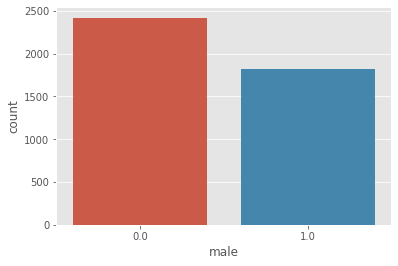

###########################################################################
     education      Ratio
1.0       1720  40.585182
2.0       1358  32.043417
3.0        687  16.210477
4.0        473  11.160925


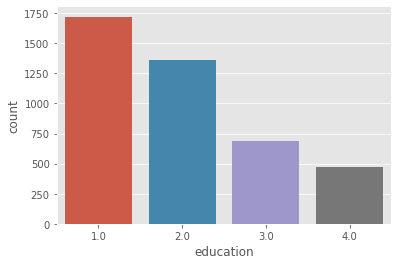

###########################################################################
     currentSmoker      Ratio
0.0         2144    50.589901
1.0         2094    49.410099


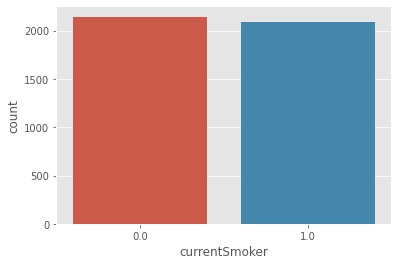

###########################################################################
     BPMeds      Ratio
0.0    4114  97.074092
1.0     124   2.925908


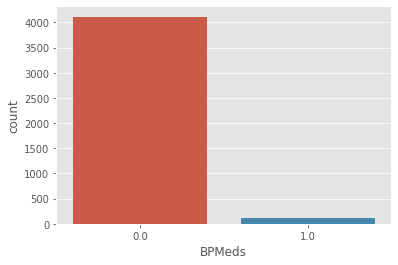

###########################################################################
     prevalentStroke      Ratio
0.0         4213      99.410099
1.0           25       0.589901


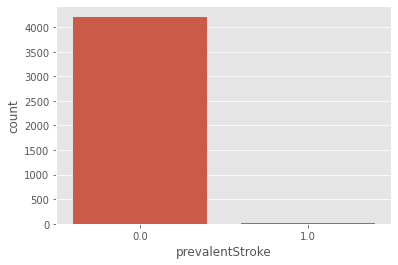

###########################################################################
     prevalentHyp      Ratio
0.0         2922   68.947617
1.0         1316   31.052383


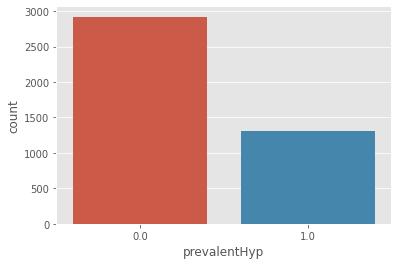

###########################################################################
     diabetes      Ratio
0.0      4129  97.428032
1.0       109   2.571968


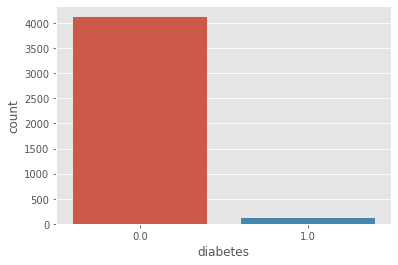

###########################################################################
     TenYearCHD      Ratio
0.0        3594  84.804153
1.0         644  15.195847


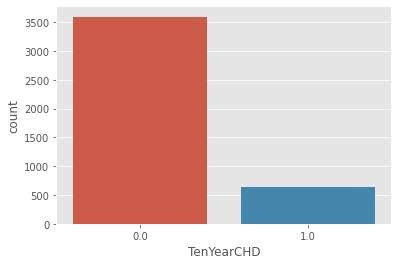

In [ ]:
#gráficas de datos
def cat_summary(dataframe, col_name, plot = False):

  print(75*'#')
  print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                      "Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))
  
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show()

for col in columnas:
  cat_summary(df,col, plot=True)

<IPython.core.display.Javascript object>

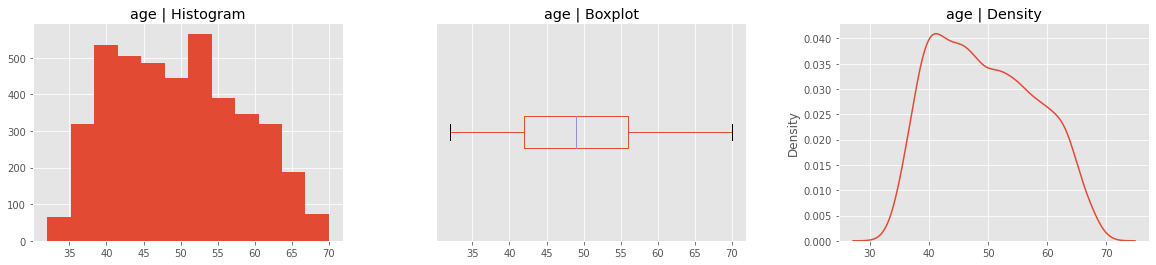

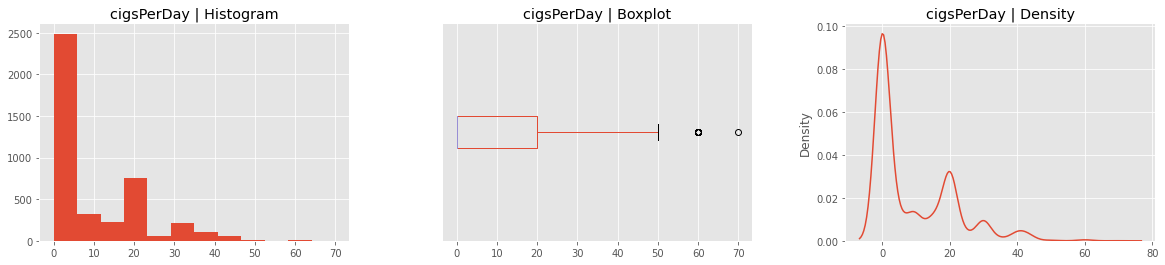

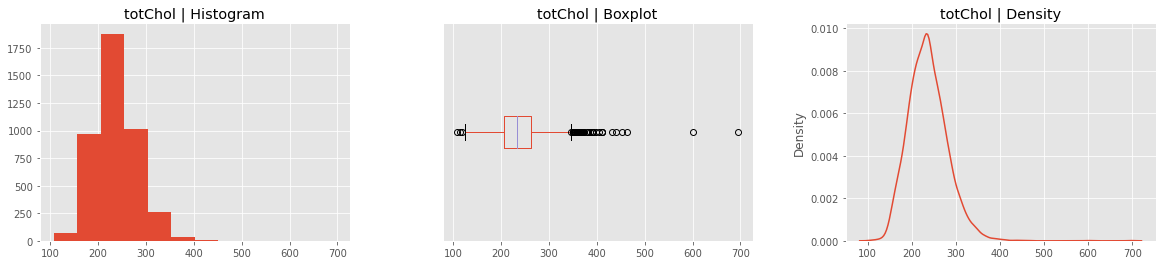

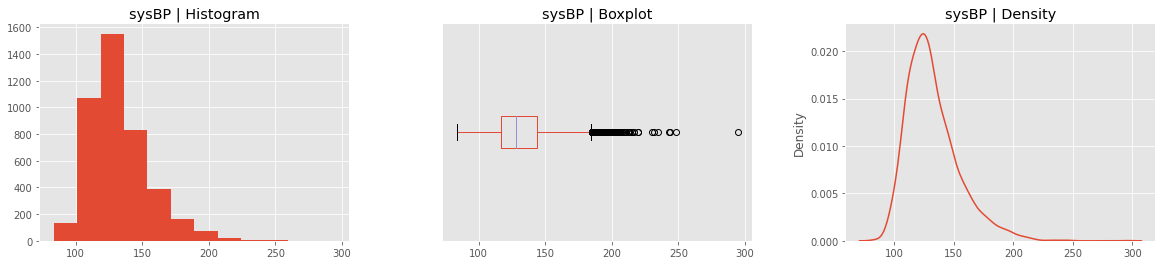

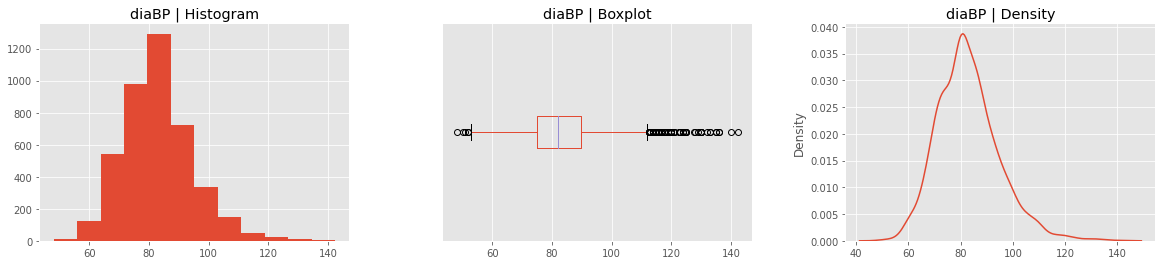

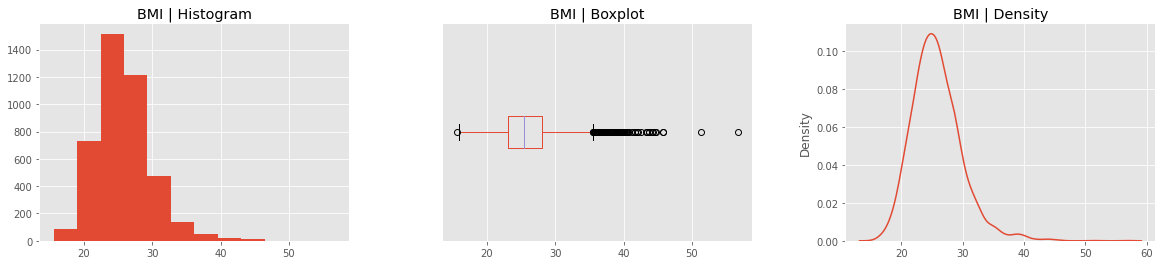

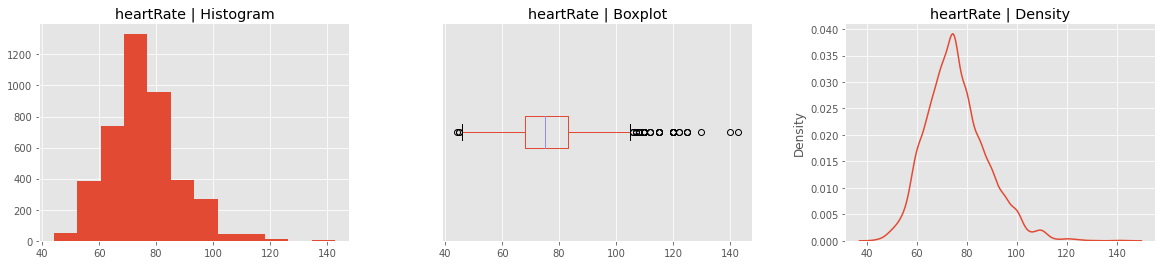

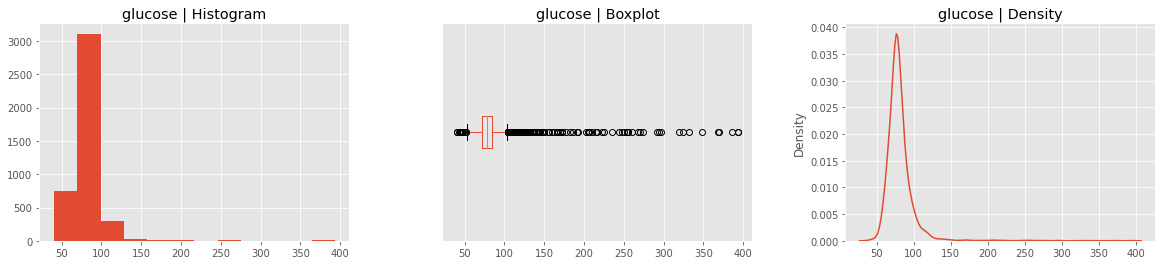

In [ ]:
def num_plot(data, cat_length=16,hist_bins=12, figsize=(20,4)):
  valores=[col for col in data.columns if data[col].dtypes !="0"
            and len(data[col].unique())>= cat_length]

  for i in valores:
    fig,axes=plt.subplots(1,3,figsize=figsize)
    data.hist(str(i),bins=hist_bins,ax=axes[0])
    data.boxplot(str(i), ax=axes[1], vert=False);
    try:
      sns.kdeplot(np.array(data[str(i)]))
    except:
      ValueError

    axes[1].set_yticklabels([])
    axes[1].set_yticks([])
    axes[0].set_title(i + " | Histogram")
    axes[1].set_title(i + " | Boxplot")
    axes[2].set_title(i + " | Density")

    plt.show()

num_plot(df)

<IPython.core.display.Javascript object>

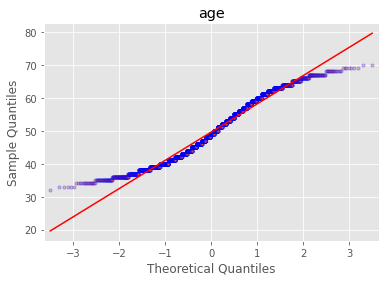

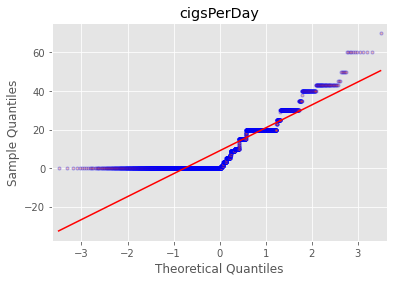

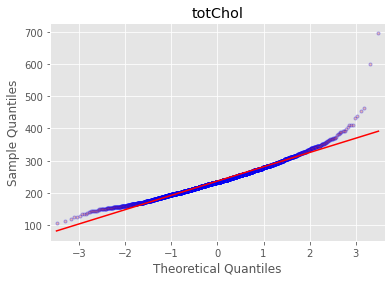

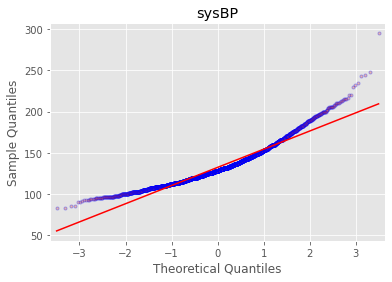

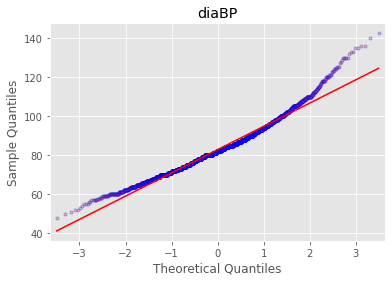

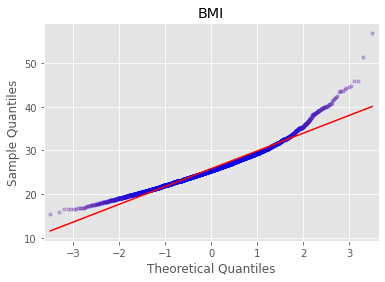

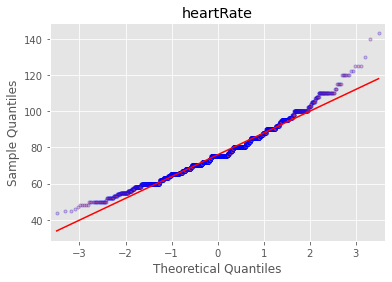

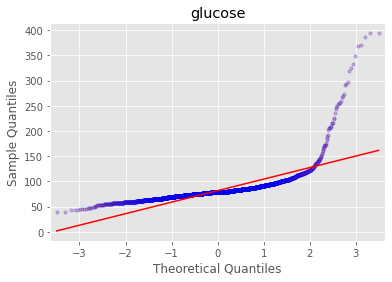

In [ ]:

for i in valores:
  sm.qqplot (df[i],line='s',marker='.', markeredgecolor='b', alpha=0.3)
  plt.title(i)
  plt.show ()


<IPython.core.display.Javascript object>

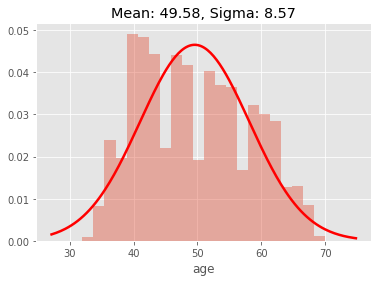

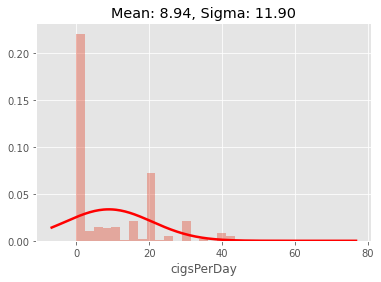

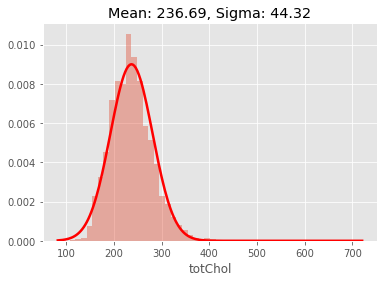

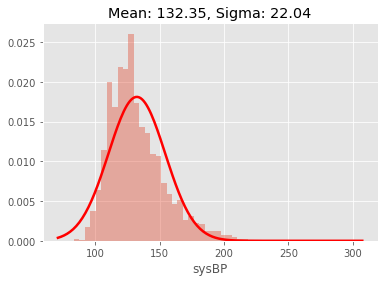

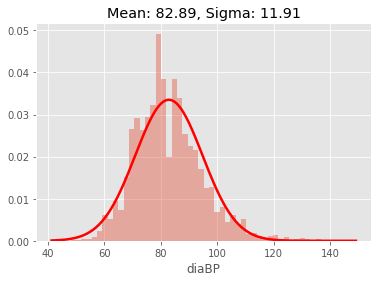

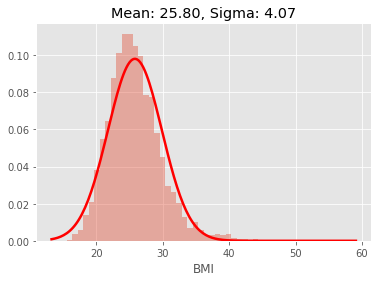

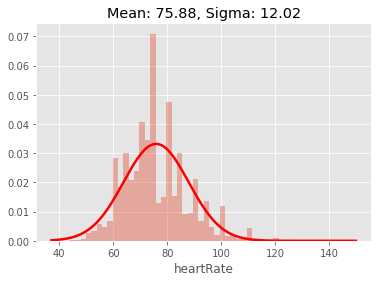

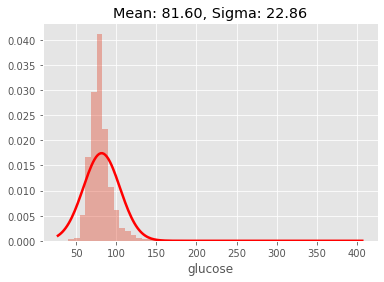

In [ ]:
from scipy.stats import norm # Usamos la función normal de scipy stats para
# ajustar el histograma de la distribución
#visualización del histograma normalizado y de la función de densidad en la misma gráfica
for i in valores:
  pars = norm.fit(df[i].values)
  sns.distplot(df[i], kde=False, fit=norm, fit_kws={'color': 'r', 'linewidth': 2.5})
  plt.title("Mean: {:.2f}, Sigma: {:.2f}".format(pars[0], pars[1]))
  plt.show()


<IPython.core.display.Javascript object>

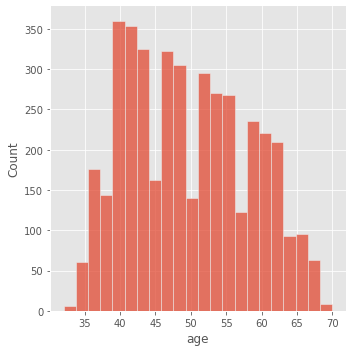

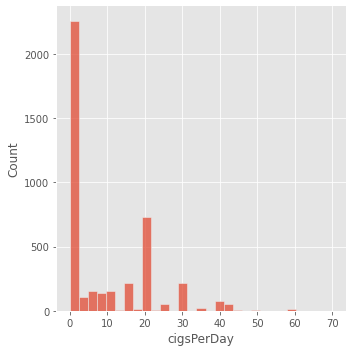

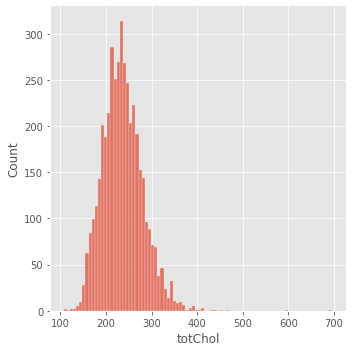

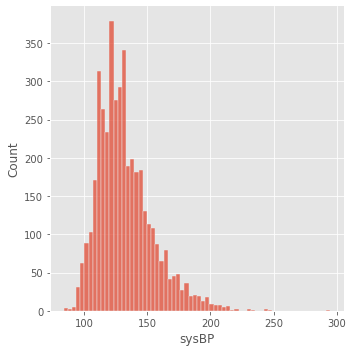

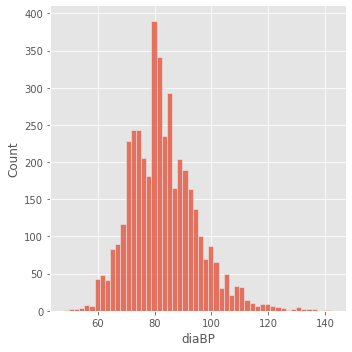

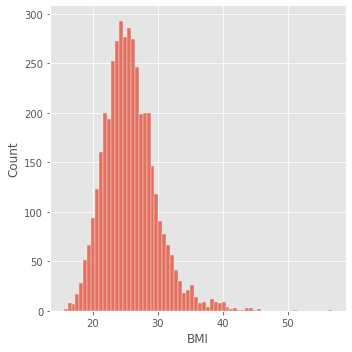

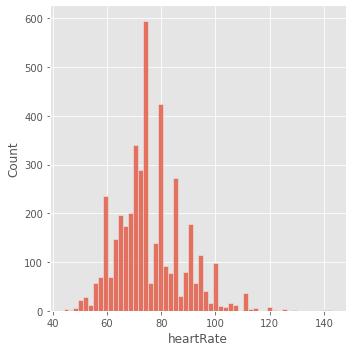

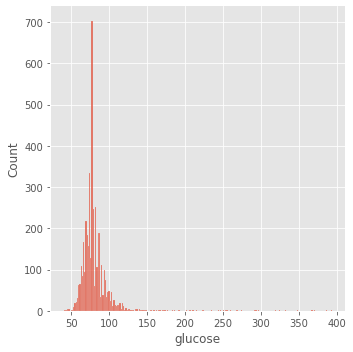

In [ ]:
#Visualizamos de otra forma, sin normalizar
for i in valores:
  sns.displot(df[i])


<IPython.core.display.Javascript object>

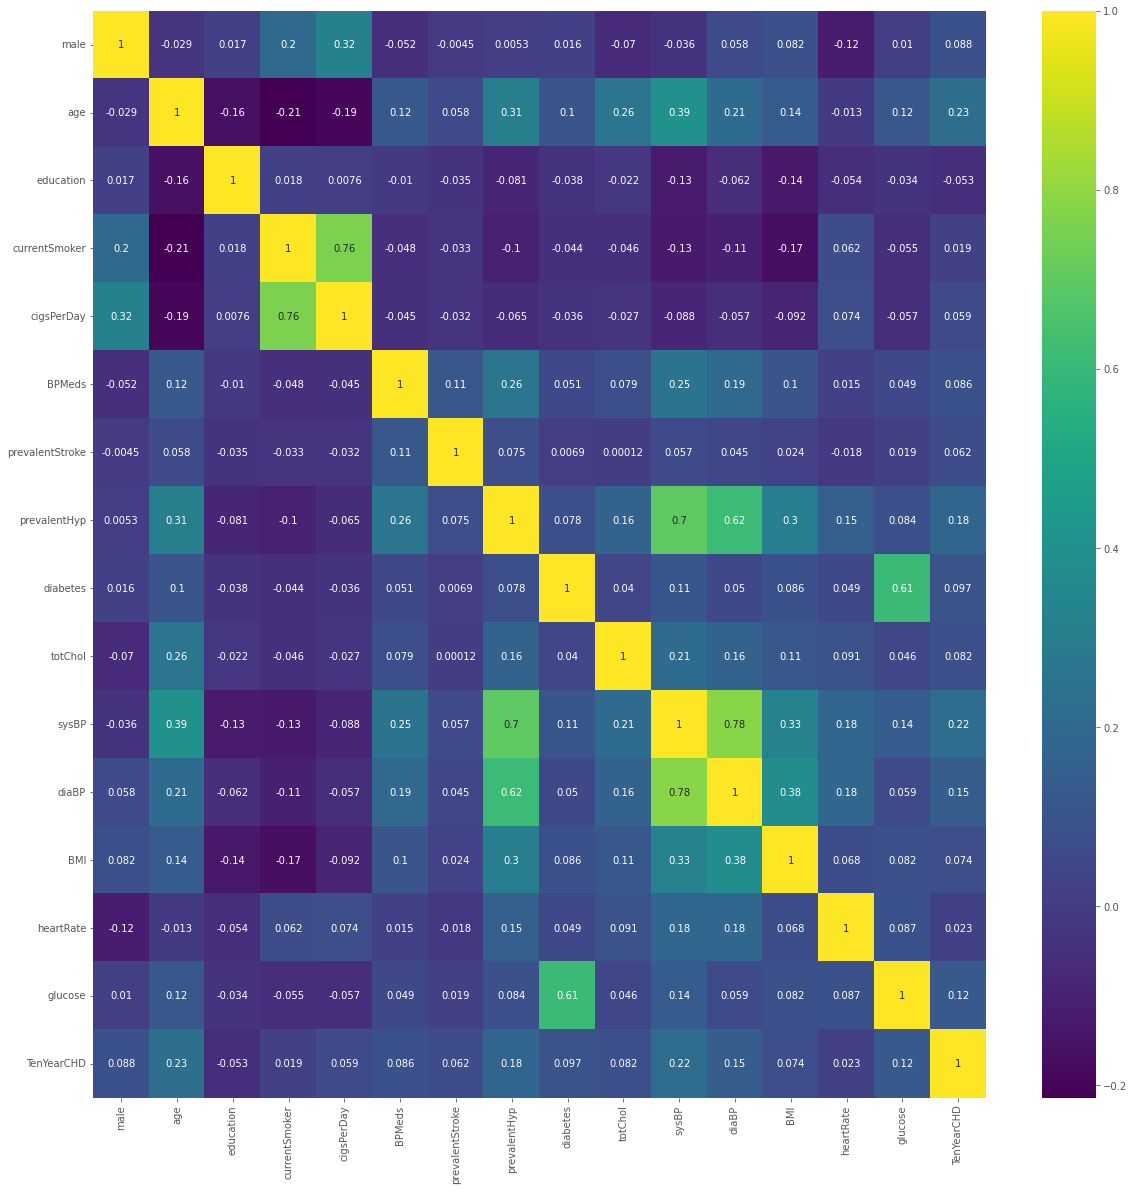

In [ ]:
# Revisamos la matriz de correlación para ver posibles dependencias
fig = plt.figure(1, figsize=(20, 20))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),annot=True, cmap='viridis')
plt.show()
#Los resultados que se observan de correlación tiene mucha lógica... cigsperday-smoker...sysBP-diaBP-Hyp...glucose-diabetes

<IPython.core.display.Javascript object>

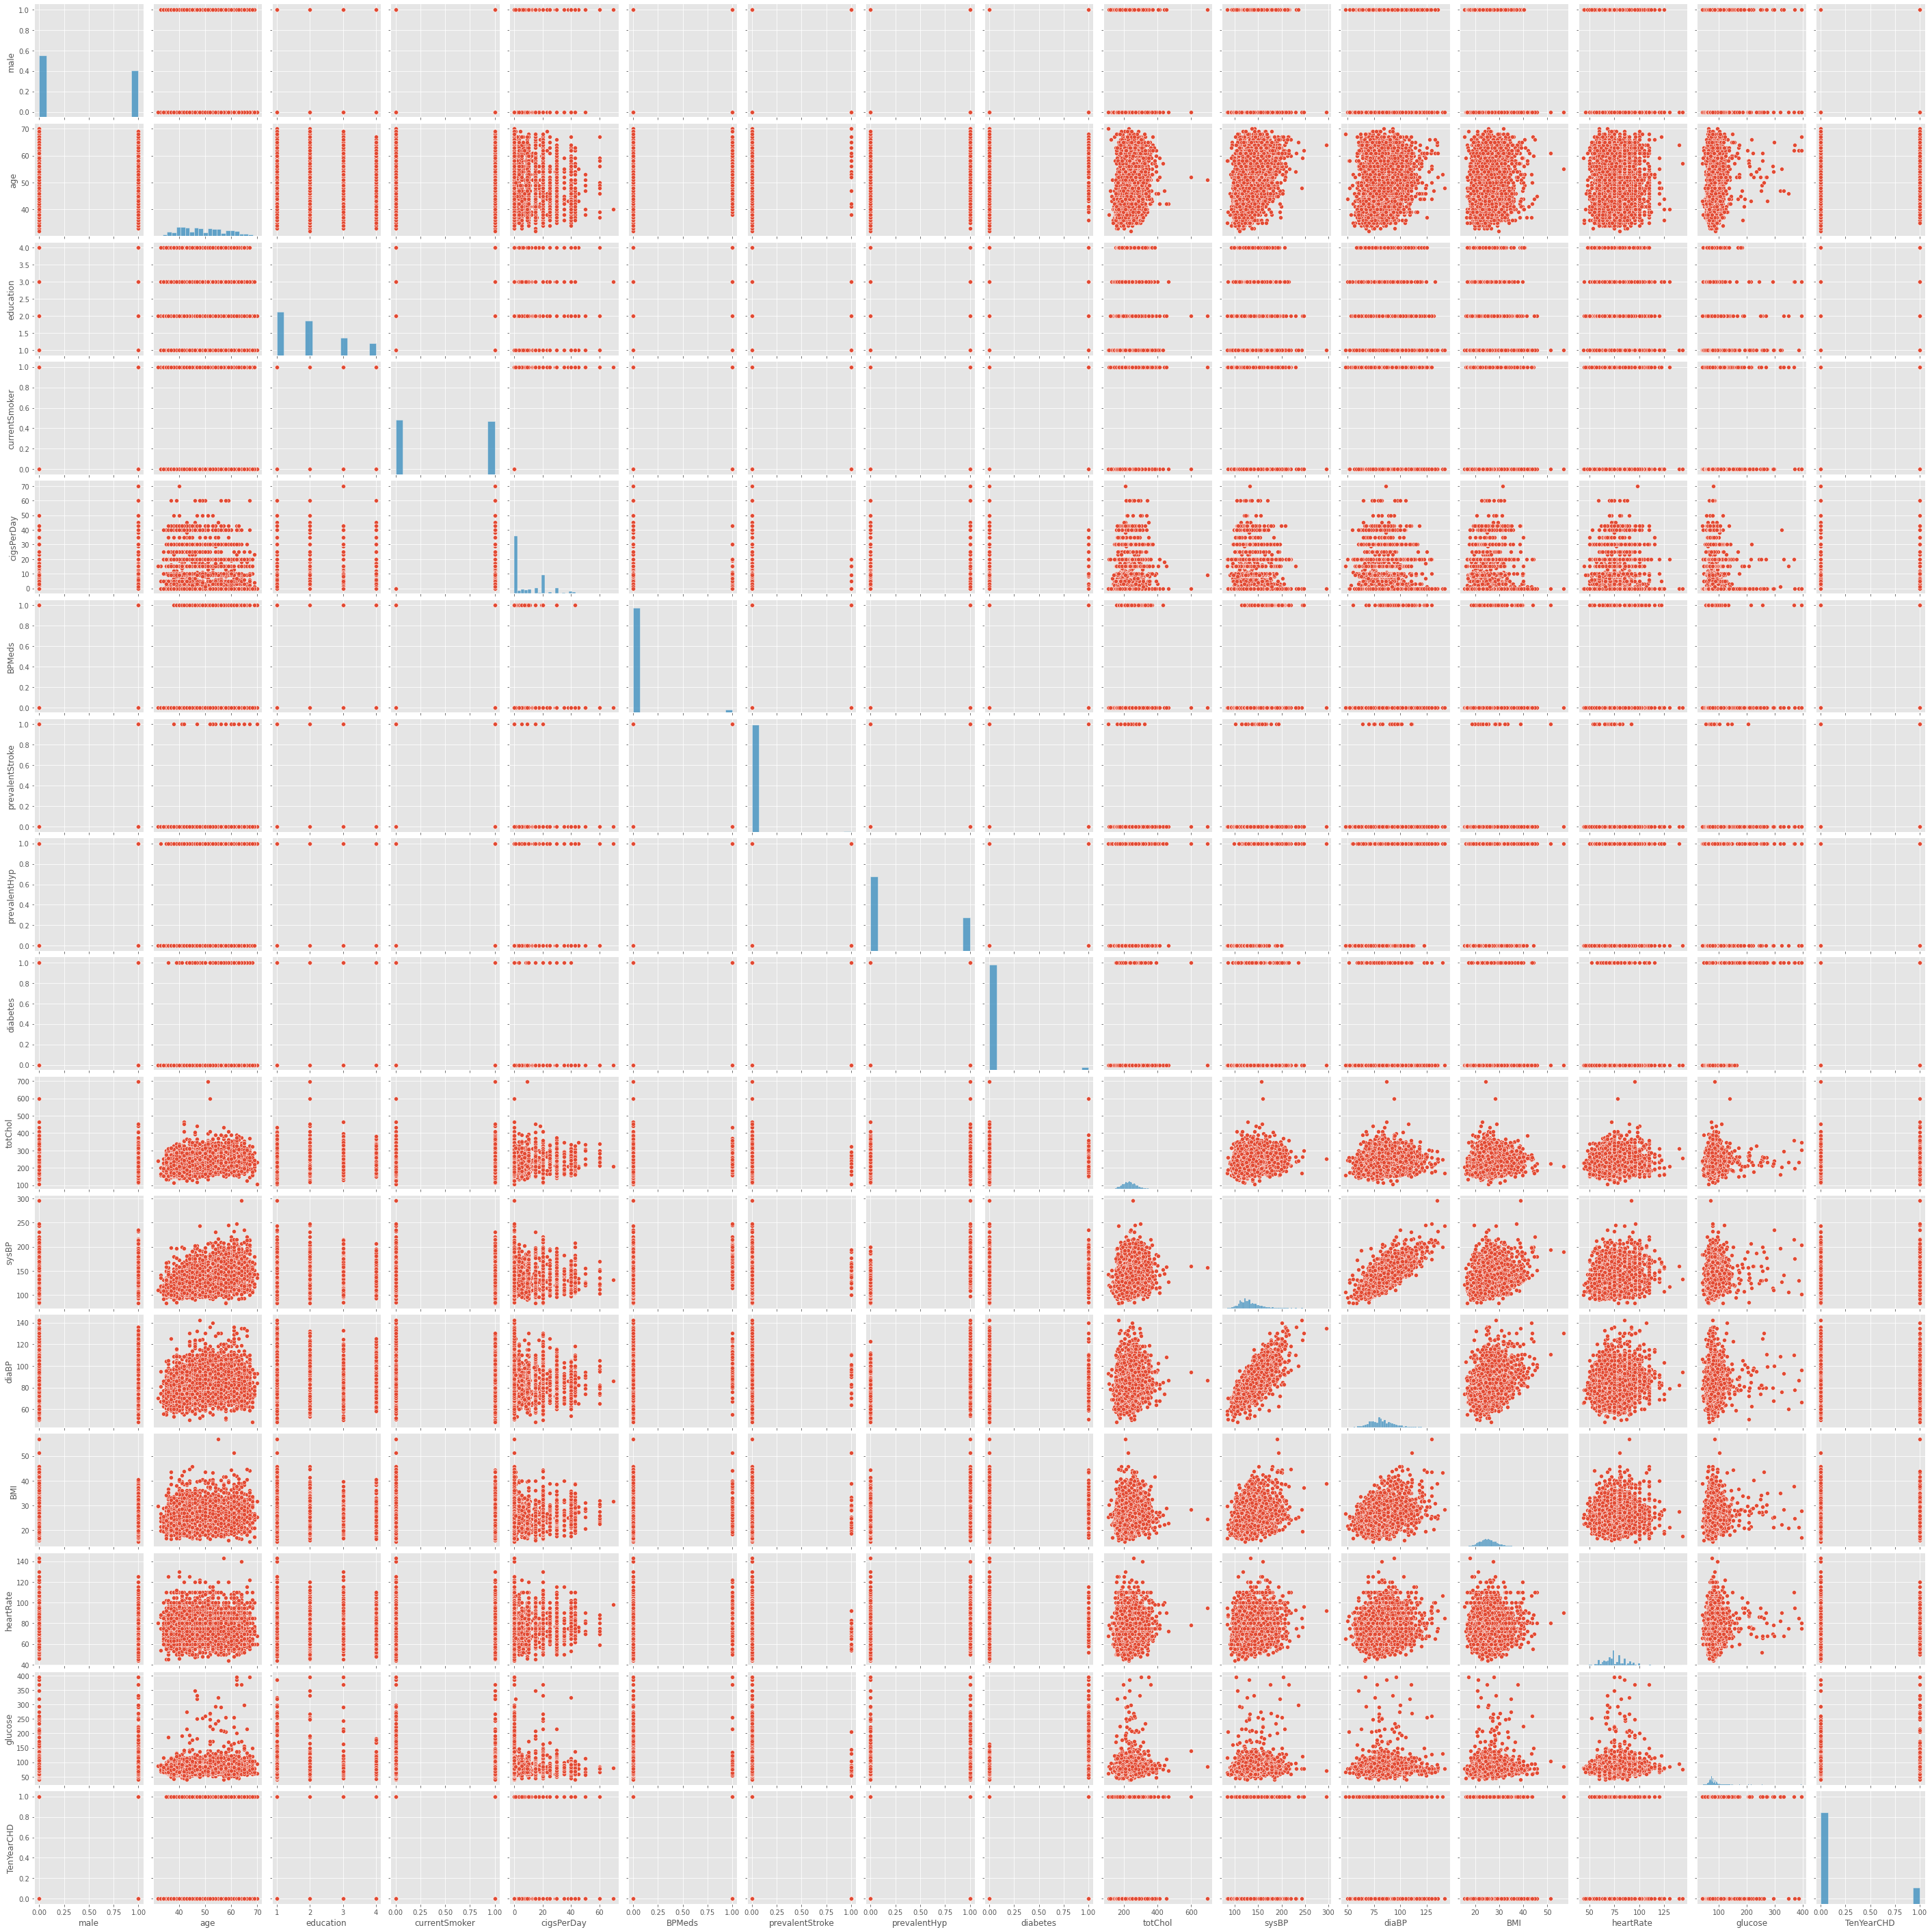

In [ ]:
# Creamos un pair plot para visualizar las morfología de las correlaciones
sns.pairplot(df)

<IPython.core.display.Javascript object>

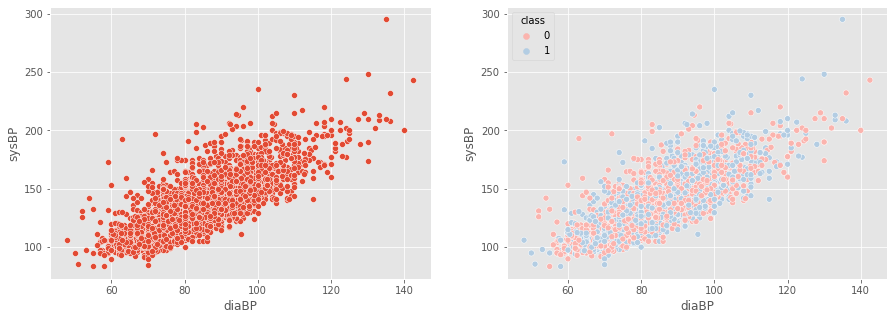

In [ ]:
# Veámos la cómo se relacionan los niveles de diaBP y sysBP. Aunque se podría hacer con las que se quiera. Pero por simplificar.
fig = plt.figure(1, figsize=(15,5))
fig.add_subplot(121)
sns.scatterplot(data=df, x=df['diaBP'], y=df['sysBP'], palette='Pastel1', legend='full')
plt.xlabel('diaBP')
plt.ylabel('sysBP')

# Para evaluar la separación entre datos, necesitaríamos etiqueta categórica para 
# cada variable, hagamos una dummy
import numpy as np
class_l = np.random.randint(2, size=len(df['diaBP'].values))
df_l = df
df_l['class'] = class_l
fig.add_subplot(122)
sns.scatterplot(data=df_l, x=df_l['diaBP'], y=df_l['sysBP'], palette='Pastel1', legend='full', hue='class')
# Como vemos, al haber utilizado una distribución aleatoria los datos aparecen mezclados

<IPython.core.display.Javascript object>

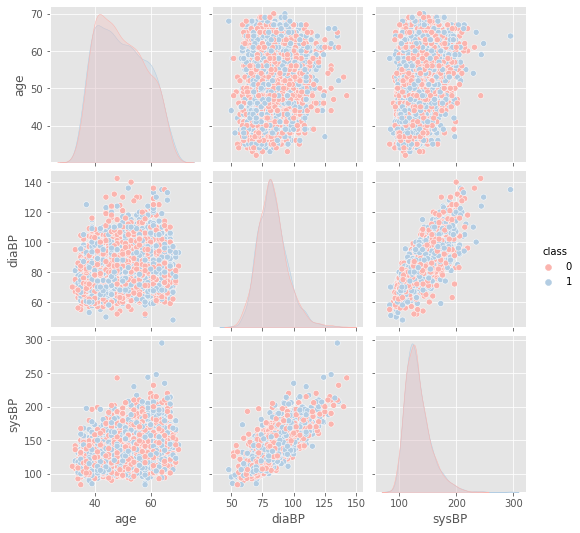

In [ ]:
#Gráfico de pares (Ejemplo)
df_l = df[['age', 'diaBP', 'sysBP', 'class']]
sns.pairplot(df_l, palette='Pastel1', hue='class')
plt.show()

**APARTADO 3.** Si lo estimas necesario, ejecuta métodos de imputación y normalización de datos explicando explicando brevemente tus decisiones.

In [ ]:
#Los valores nulos ya se trataron anteriormente, pero también se podrían haber tratado aquí.
'''
mvs = df.isnull().sum() 
print('Número de valores perdidos por variable:\n',mvs)

#Se sustituye esos valores nulos por la mediana de esa variable
for col in df_float.columns:
  print(f"Imputing for {col} with {df[col].median()}\n")
  df[col]=df[col].fillna(df[col].median())
'''


<IPython.core.display.Javascript object>

'\nmvs = df.isnull().sum() \nprint(\'Número de valores perdidos por variable:\n\',mvs)\n\n#Se sustituye esos valores nulos por la mediana de esa variable\nfor col in df_float.columns:\n  print(f"Imputing for {col} with {df[col].median()}\n")\n  df[col]=df[col].fillna(df[col].median())\n'

In [ ]:
#Se ha visto en las gráficas anteriores, sobre todo en las gráficas de bigotes que hay una serie de outliers. Estos valores se tienen que tratar.
#En este caso se decide corregirlos y meterlos dentro del umbral ya que se considera relevante su uso y la información que pueden aportar. Más que eliminarlos 
#y perder mucha información. En caso de que esto afecte a los resultados, si que se eliminaría
from tables.parameters import LOWEST_HIT_RATIO
def outlier_thresholds (dataframe, valores, q1=0.25,q3=0.75):
  quartile1= dataframe[valores].quantile(q1)
  quartile3=dataframe[valores].quantile(q3)
  interquantile_range=quartile3-quartile1
  up_limit=quartile3+1.5*interquantile_range
  low_limit=quartile1-1.5*interquantile_range
  return low_limit,up_limit

def check_outlier (dataframe, valores):
  low_limit,up_limit=outlier_thresholds(dataframe,valores)
  if dataframe [(dataframe[valores]>up_limit) | (dataframe[valores]<low_limit)].any(axis=None):
    return True
  else:
    return False

def replace_with_thresholds(dataframe, variable):
  low_limit, up_limit=outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable]<low_limit), variable]=low_limit
  dataframe.loc[(dataframe[variable]>up_limit), variable]=up_limit

for col in valores:
  replace_with_thresholds(df,col)

for col in valores:
  print(col, check_outlier(df,col))


#Se han corregido los outliers y se comprueba que en ninguna variable queda outliers.

<IPython.core.display.Javascript object>

age False
cigsPerDay False
totChol False
sysBP False
diaBP False
BMI False
heartRate False
glucose False


<IPython.core.display.Javascript object>

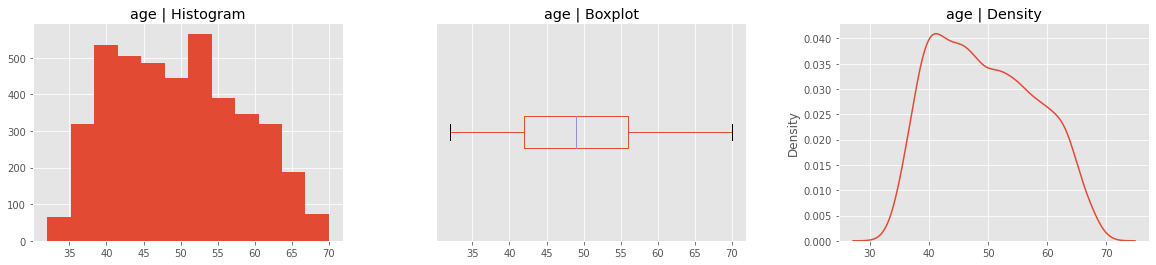

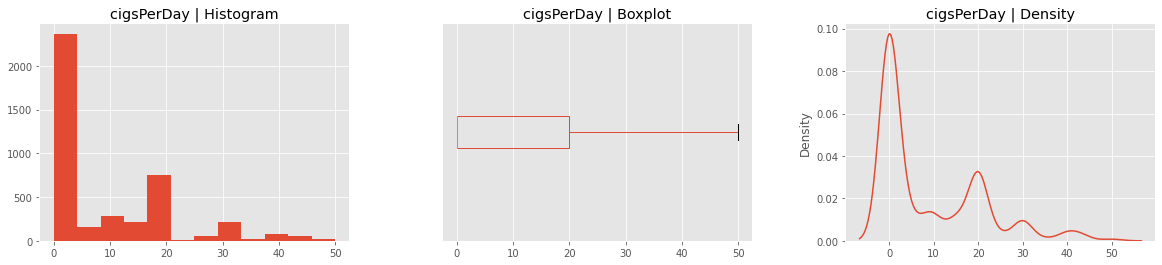

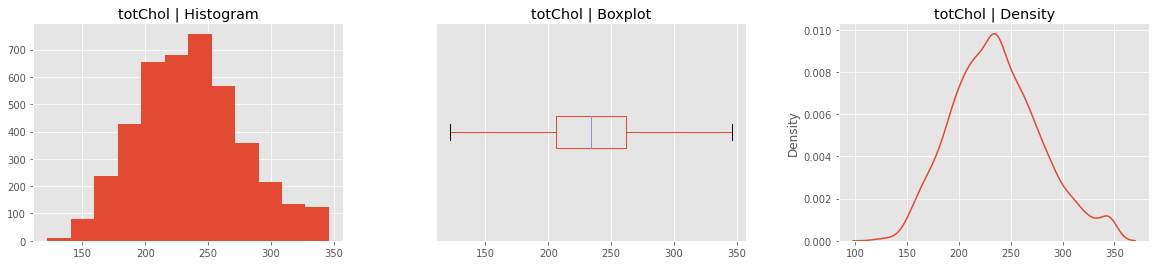

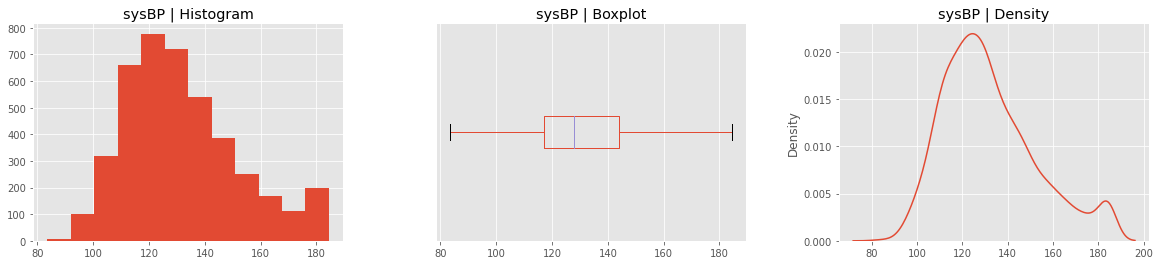

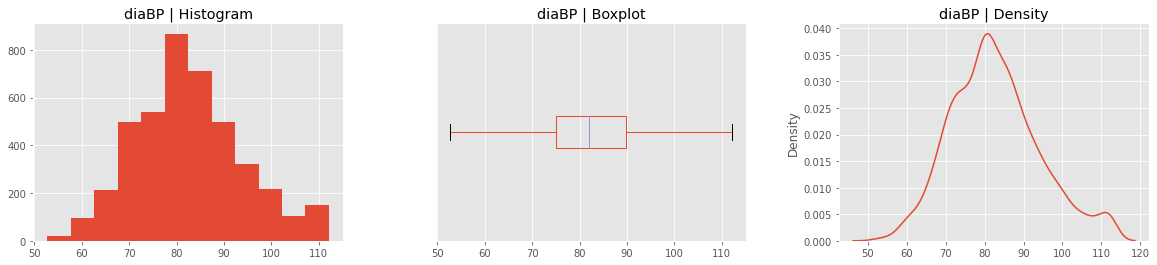

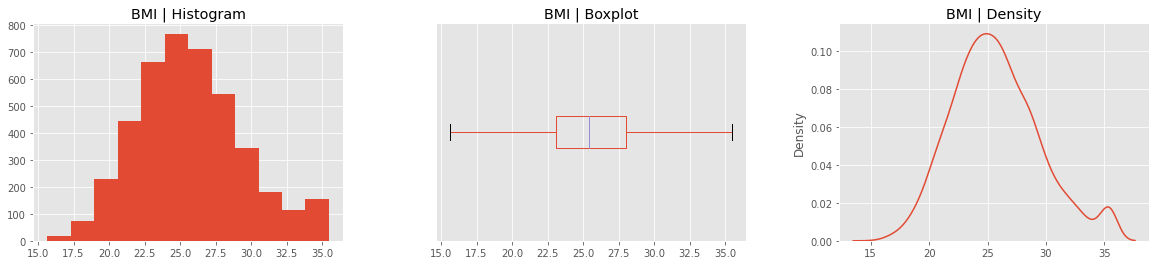

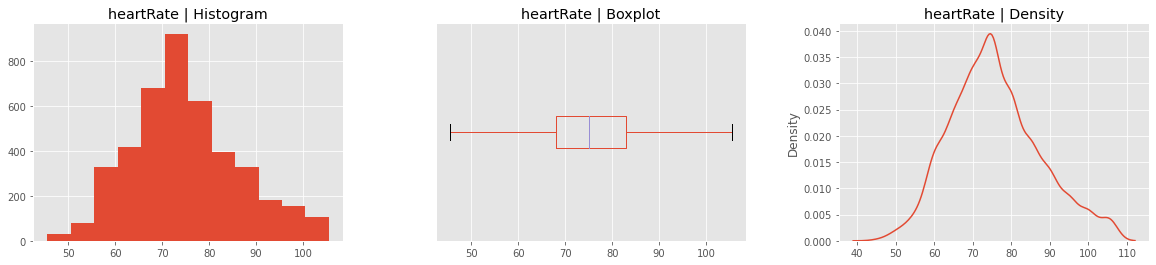

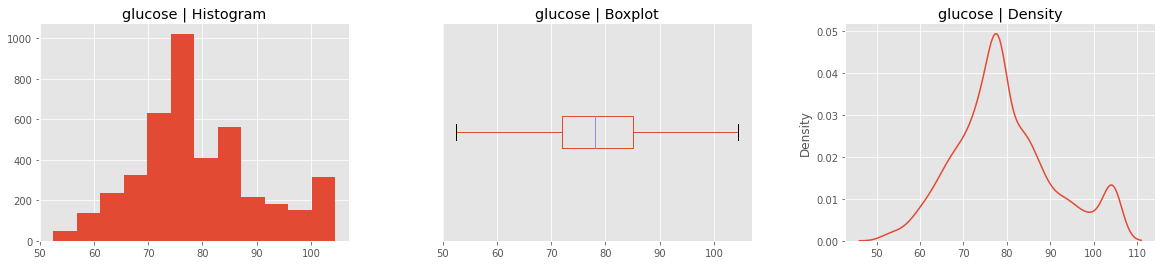

In [ ]:
#Volvemos a ejecutar y comprobamos que no hay ourliers ya.
def num_plot(data, cat_length=16,hist_bins=12, figsize=(20,4)):
  valores=[col for col in data.columns if data[col].dtypes !="0"
            and len(data[col].unique())>= cat_length]

  for i in valores:
    fig,axes=plt.subplots(1,3,figsize=figsize)
    data.hist(str(i),bins=hist_bins,ax=axes[0])
    data.boxplot(str(i), ax=axes[1], vert=False);
    try:
      sns.kdeplot(np.array(data[str(i)]))
    except:
      ValueError

    axes[1].set_yticklabels([])
    axes[1].set_yticks([])
    axes[0].set_title(i + " | Histogram")
    axes[1].set_title(i + " | Boxplot")
    axes[2].set_title(i + " | Density")

    plt.show()

num_plot(df)

In [ ]:
#No hace falta hacer un encoding porque no hay variables categoricas... sino:
'''def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
      dataframe=pd.get_dummies(dataframe,
                           columns=categorical_cols,
                           drop_first=drop_first)
      return dataframe

      df=one_hot_encoder(df, cat_cols, drop_first=True)'''

In [ ]:
# La siguiente fase del pre-procesado consiste en re-escalar los datos
# En este caso aplicaremos métodos de la clase StandardScaler de Sci-kit learn
from sklearn import preprocessing
# El método MinMaxScaler de sklearn nos permite aplicar un rescalado en el rango
# especificado
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df_s = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("\n Dataset escalado: \n", df_s)

<IPython.core.display.Javascript object>


 Dataset escalado: 
       male       age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  class
0      1.0  0.184211   1.000000          0.0          0.00     0.0          0.0              0.0        0.0  0.325893  0.222772  0.290966  0.571167   0.575000  0.471154         0.0    0.0
1      0.0  0.368421   0.333333          0.0          0.00     0.0          0.0              0.0        0.0  0.571429  0.371287  0.475840  0.659922   0.825000  0.451923         0.0    1.0
2      1.0  0.421053   0.000000          1.0          0.40     0.0          0.0              0.0        0.0  0.549107  0.435644  0.459034  0.488969   0.491667  0.336538         0.0    1.0
3      0.0  0.763158   0.666667          1.0          0.60     0.0          0.0              1.0        0.0  0.459821  0.658416  0.711134  0.652358   0.325000  0.971154         1.0    1.0
4      0.0  0.368421   0.666667       

In [ ]:
'''# OTRA FORMA DE HACERLO
#A continuación, se hace un escalado de las variables para posteriormente poder compararlas, sino se tiene valores muy diversos y que no se pueden 
#relacionar en cuanto a su magnitud.
rs=RobustScaler()
tr=df
tr[valores]=rs.fit_transform(tr[valores])
tr[columnas]=rs.fit_transform(tr[columnas])
tr.head()'''

<IPython.core.display.Javascript object>

'# OTRA FORMA DE HACERLO\n#A continuación, se hace un escalado de las variables para posteriormente poder compararlas, sino se tiene valores muy diversos y que no se pueden \n#relacionar en cuanto a su magnitud.\nrs=RobustScaler()\ntr=df\ntr[valores]=rs.fit_transform(tr[valores])\ntr[columnas]=rs.fit_transform(tr[columnas])\ntr.head()'

<IPython.core.display.Javascript object>

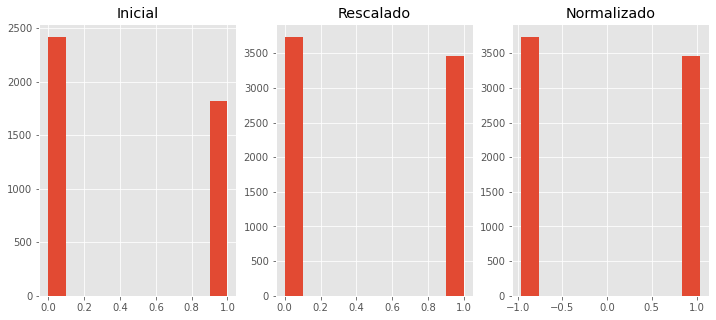

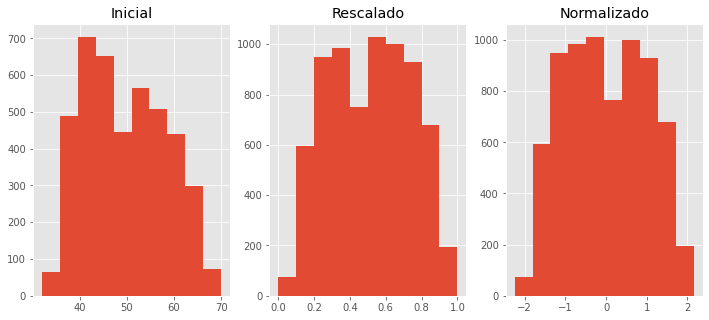

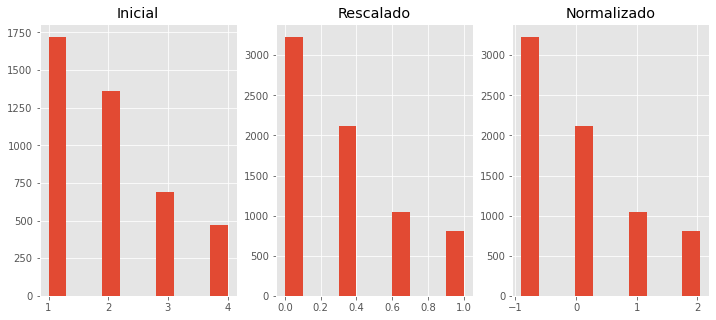

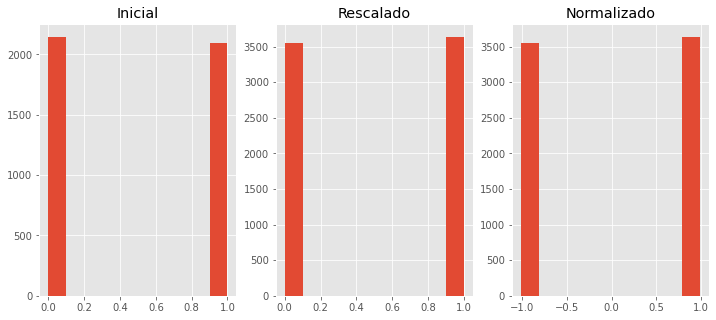

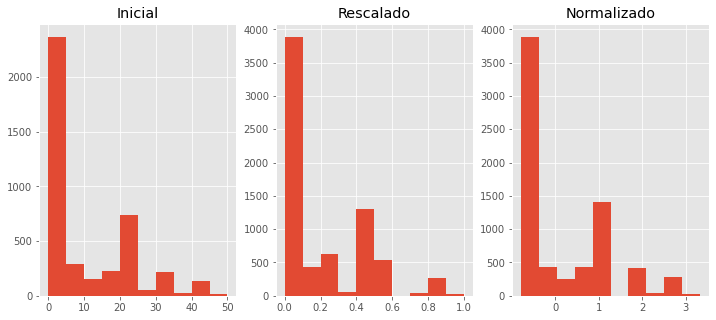

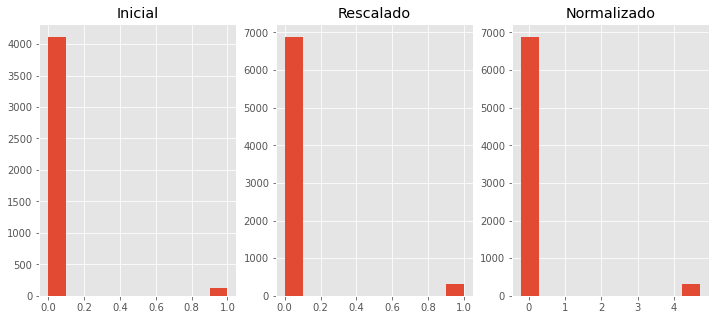

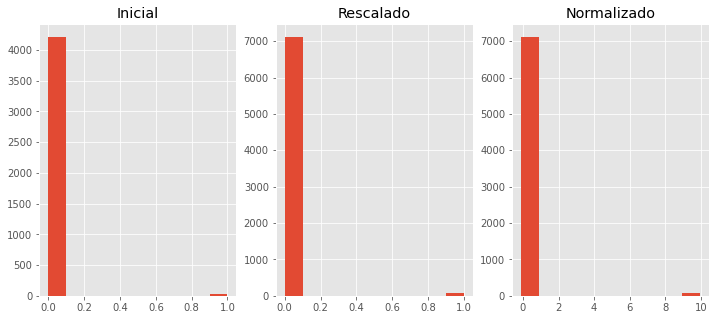

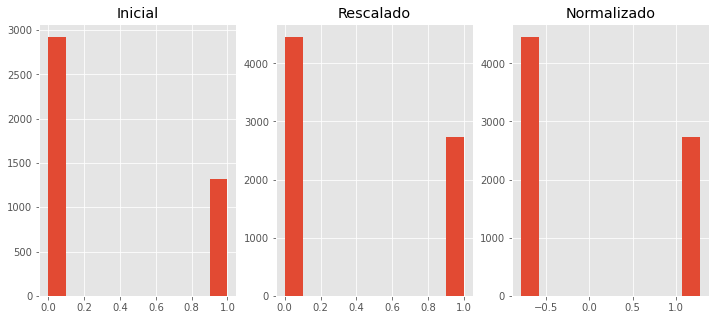

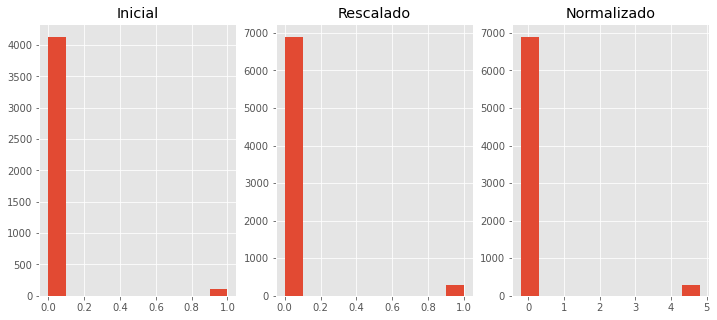

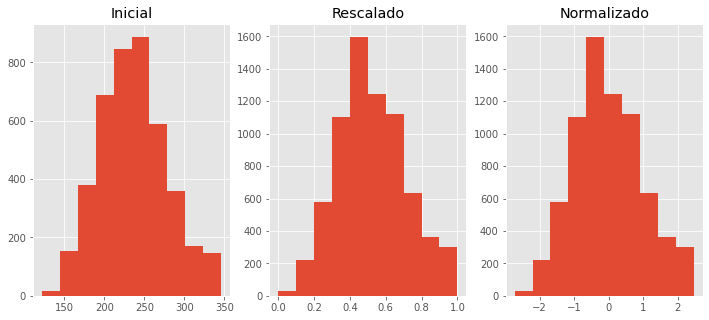

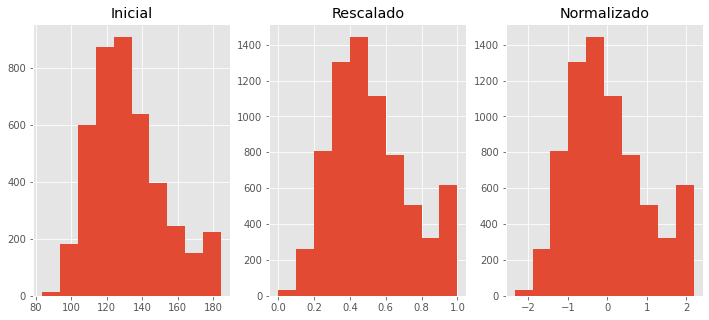

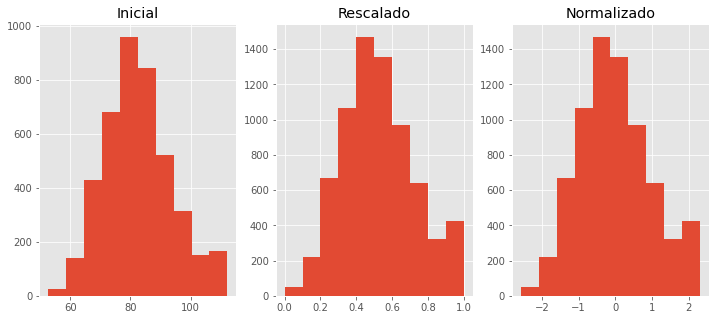

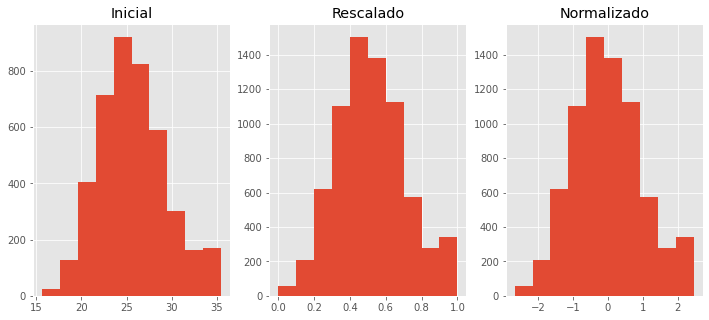

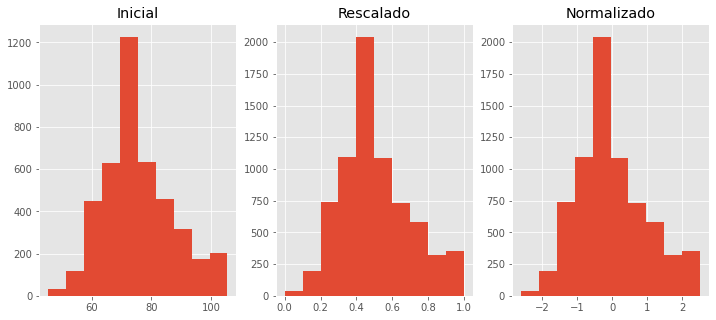

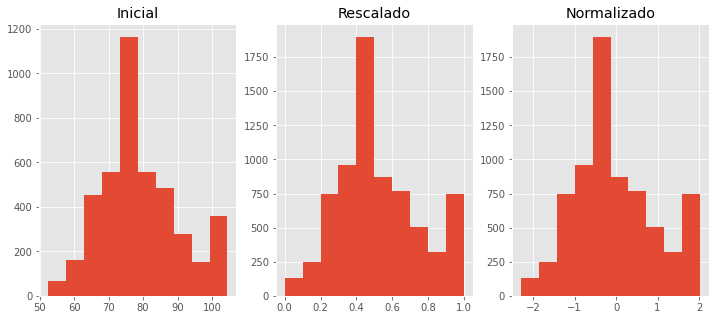

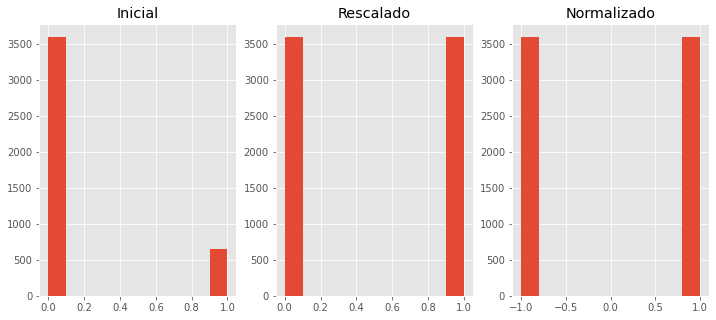

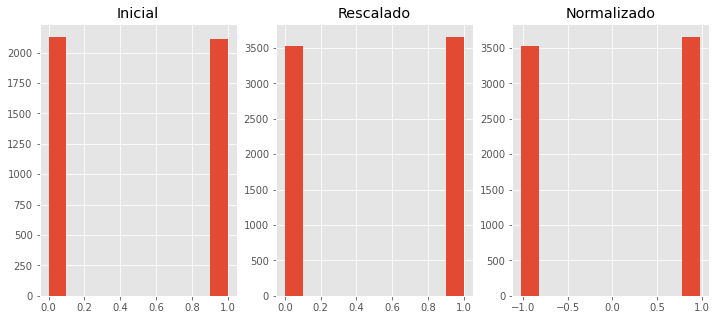

In [ ]:
#normalizar
# Normalización 
df_norm = (df_s - df_s.mean()) / df_s.std()

# Veámos el resultado
import matplotlib.pyplot as plt
for i in df:
  fig = plt.figure(1, figsize=(12, 5))
  plt.subplot(131)
  plt.hist(df[i].values)
  plt.title("Inicial")
  plt.subplot(132)
  plt.hist(df_s[i].values)
  plt.title("Rescalado")
  plt.subplot(133)
  plt.hist(df_norm[i].values)
  plt.title("Normalizado")
  plt.show()

In [ ]:
#OPCIONAL--> SE DECIDE HACERLO PARA AUMENTAR EL NÚMERO DE MUESTRAS
#Separar las clases mayoritarias y minoritarias y aplicar la técnica up.
#Dentro de las clases que solo pueden tiene dos valores, hay opciones que tienen pocas muestras, por ello
#se propone aumentar estas muestras mediante una técnica up, es decir,
#aumentar el número de muestras para tener las mismas en ambas opciones.

#Las variables TenYearsCHD, diabetes, prevalentHyp, prevalentStroke y BPMeds tienen muy pocos valores de 1.

#separate majority and minority classes
'''
#BPMeds
df_maj_1=df[df.BPMeds==0]
df_min_1=df[df.BPMeds==1]
print("The majority sample size of BPMeds is: {}".format(len(df_maj_1)))

#prevalentStroke
df_maj_2=df[df.prevalentStroke==0]
df_min_2=df[df.prevalentStroke==1]
print("The majority sample size of prevalentStroke is: {}".format(len(df_maj_2)))

#prevalentHyp
df_maj_3=df[df.prevalentHyp==0]
df_min_3=df[df.prevalentHyp==1]
print("The majority sample size of prevalentHyp is: {}".format(len(df_maj_3)))

#diabetes
df_maj_4=df[df.diabetes==0]
df_min_4=df[df.diabetes==1]
print("The majority sample size of diabetes is: {}".format(len(df_maj_4)))
'''
#TenYearCHD
df_maj_5=df[df.TenYearCHD==0]
df_min_5=df[df.TenYearCHD==1]
print("The majority sample size of TenYearCHD is: {}".format(len(df_maj_5)))

<IPython.core.display.Javascript object>

The majority sample size of TenYearCHD is: 3594


In [ ]:
from sklearn.utils import resample
'''
#Hago unos resamples para acabar con los datos desbalanceados
#upsamble minority class

#BPMeds
df_min_1=resample(df_min_1,
                   replace=True, #sample with replacement
                   n_samples = 4114, #to match majority class
                   random_state=36) #reproducible results

#Combine majority class with upsampled minority class
df_up1=pd.concat([df_min_1, df_maj_1])

#prevalentStroke

df_min_2=resample(df_min_2,
                   replace=True, #sample with replacement
                   n_samples = 4213, #to match majority class
                   random_state=123) #reproducible results

#Combine majority class with upsampled minority class
df_up2=pd.concat([df_min_2, df_maj_2])


#prevalentHyp
df_min_3=resample(df_min_3,
                   replace=True, #sample with replacement
                   n_samples = 2922, #to match majority class
                   random_state=100) #reproducible results

#Combine majority class with upsampled minority class
df_up3=pd.concat([df_min_3, df_maj_3])

#diabetes
df_min_4=resample(df_min_4,
                   replace=True, #sample with replacement
                   n_samples = 4129, #to match majority class
                   random_state=23) #reproducible results

#Combine majority class with upsampled minority class
df_up4=pd.concat([df_min_4, df_maj_4])

'''
#TenYearCHD
df_min_5=resample(df_min_5,
                   replace=True, #sample with replacement
                   n_samples = 3594, #to match majority class
                   random_state=103) #reproducible results
df_up5=pd.concat([df_min_5, df_maj_5])

#df_up=pd.concat([df_up1,df_up2,df_up3,df_up4,df_up5])


df_up5.info()

#Se ha conseguido aumentar los datos hasta 37944

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 376 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             7188 non-null   float64
 1   age              7188 non-null   float64
 2   education        7188 non-null   float64
 3   currentSmoker    7188 non-null   float64
 4   cigsPerDay       7188 non-null   float64
 5   BPMeds           7188 non-null   float64
 6   prevalentStroke  7188 non-null   float64
 7   prevalentHyp     7188 non-null   float64
 8   diabetes         7188 non-null   float64
 9   totChol          7188 non-null   float64
 10  sysBP            7188 non-null   float64
 11  diaBP            7188 non-null   float64
 12  BMI              7188 non-null   float64
 13  heartRate        7188 non-null   float64
 14  glucose          7188 non-null   float64
 15  TenYearCHD       7188 non-null   float64
 16  class            7188 non-null   int64  
dtypes: float64(1

In [ ]:
df_up5.head()

<IPython.core.display.Javascript object>

male   age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  class
376    0.0  45.0        2.0          1.0          20.0     0.0          0.0              0.0        0.0    285.0  116.0   87.0  23.85       65.0     55.0         1.0      1
2315   1.0  63.0        1.0          0.0           0.0     0.0          0.0              1.0        0.0    219.0  145.5   80.0  26.60       72.0     78.0         1.0      0
1193   0.0  64.0        1.0          0.0           0.0     0.0          0.0              0.0        0.0    280.0  127.0   77.0  30.39       56.0     78.0         1.0      1
1583   1.0  36.0        2.0          1.0          20.0     0.0          0.0              0.0        0.0    242.0  118.5   84.5  24.04       78.0    103.0         1.0      1
1832   0.0  61.0        2.0          1.0          15.0     0.0          0.0              1.0        0.0    235.0  154.0   94.0  22.91       70.0     66.0         1.0      1

In [ ]:
#BPMeds
'''print("The minority sample size of BPMeds is: {}".format(len(df_min_1)))
print("The majority sample size of BPMeds is: {}".format(len(df_maj_1)))
#prevalentStroke
print("The minority sample size of prevalentStroke is: {}".format(len(df_min_2)))
print("The majority sample size of prevalentStroke is: {}".format(len(df_maj_2)))
#prevalentHyp
print("The minority sample size of prevalentHyp is: {}".format(len(df_min_3)))
print("The majority sample size of prevalentHyp is: {}".format(len(df_maj_3)))
#diabetes
print("The minority sample size of diabetes is: {}".format(len(df_min_4)))
print("The majority sample size of diabetes is: {}".format(len(df_maj_4)))'''
#TenYearCHD
print("The minority sample size of TenYearCHD is: {}".format(len(df_min_5)))
print("The majority sample size of TenYearCHD is: {}".format(len(df_maj_5)))


<IPython.core.display.Javascript object>

The minority sample size of TenYearCHD is: 3594
The majority sample size of TenYearCHD is: 3594


In [ ]:
#AL APLICAR EL AUMENTO DE DATOS HABRÍA QUE VOLVER A NORMALIZAR LOS DATOS. 
#EN ESTE CASO, NO SE VA A UTILIZAR LOS DATOS AUMENTADOS, SE VA A SEGUIR CON LOS ORIGINALES
#PORQUE QUIERO OBSERVAR LOS RESULTADOS QUE SE OBTIENEN SIN EL AUMENTO DE DATOS.

#Se vuelve a reescalar y a normalizar los datos.
# La siguiente fase del pre-procesado consiste en re-escalar los datos
# En este caso aplicaremos métodos de la clase StandardScaler de Sci-kit learn
from sklearn import preprocessing
# El método MinMaxScaler de sklearn nos permite aplicar un rescalado en el rango
# especificado
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df_s = pd.DataFrame(scaler.fit_transform(df_up5), columns=df_up5.columns)
print("\n Dataset escalado: \n", df_s)

# Normalización 
df_norm = (df_s - df_s.mean()) / df_s.std()
print("\n Dataset normalizado: \n", df_norm)

<IPython.core.display.Javascript object>


 Dataset escalado: 
       male       age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  class
0      0.0  0.342105   0.333333          1.0          0.40     0.0          0.0              0.0        0.0  0.727679  0.321782  0.576681  0.413830   0.325000  0.048077         1.0    1.0
1      1.0  0.815789   0.000000          0.0          0.00     0.0          0.0              1.0        0.0  0.433036  0.613861  0.459034  0.552509   0.441667  0.490385         1.0    0.0
2      0.0  0.842105   0.000000          0.0          0.00     0.0          0.0              0.0        0.0  0.705357  0.430693  0.408613  0.743633   0.175000  0.490385         1.0    0.0
3      1.0  0.105263   0.333333          1.0          0.40     0.0          0.0              0.0        0.0  0.535714  0.346535  0.534664  0.423411   0.541667  0.971154         1.0    1.0
4      0.0  0.763158   0.333333       

In [ ]:
df_pS1=df_s[df_s.TenYearCHD==0]
df_ps2=df_s[df_s.TenYearCHD==1]

print("The minority sample size of TenYearCHD of 0: {}".format(len(df_pS1)))
print("The majority sample size of TenYearCHD of 1: {}".format(len(df_ps2)))

<IPython.core.display.Javascript object>

The minority sample size of TenYearCHD of 0: 3594
The majority sample size of TenYearCHD of 1: 3594


<IPython.core.display.Javascript object>

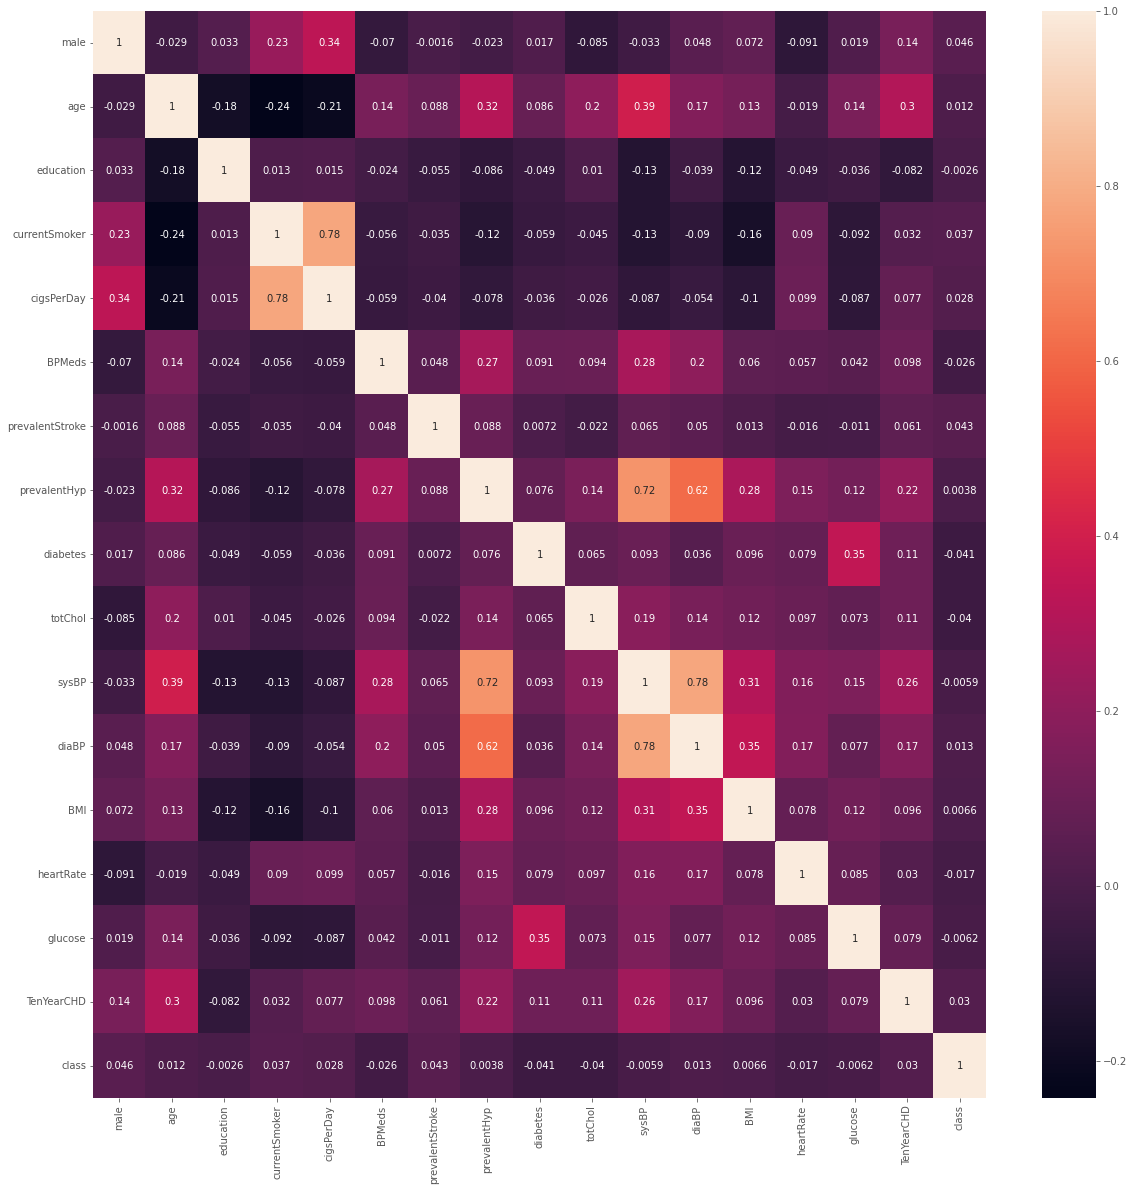

In [ ]:
# Estudiamos posibles correlaciones entre variables
fig = plt.figure(1, figsize=(20, 20))
ax = fig.add_subplot(111)
sns.heatmap(df_norm.corr(), annot=True, ax=ax)
plt.show()

In [ ]:
# En el gráfico anterior podemos comprobar que hay varias variables que presentan
# una correlación alta, vamos a ver cómo podemos descartarlas

# Implementamos una función que cree una lista con las columnas cuyo índice
# de correlación es inferior a cierto umbral (thres)
def find_lc_cols(df_norm, thres):
  """
  Encuentra las variables con una correlación mayor que el umbral (thres)
  """
  corr = df_norm.corr() 
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
      if abs(corr.iloc[i,j]) >= thres:
        if columns[j]: columns[j] = False
  
  return columns

# Ejecutamos la función y recuperamos las columnas/variables con baja correlación
lc_cols = find_lc_cols(df_norm, thres=0.80)
print("Variable/s con baja (<80%) correlación:", df_norm.columns[lc_cols].tolist())

# Construimos un Dataframe que sólo incluya las columnas seleccionadas 
s_cols = df_norm.columns[lc_cols]
df_sel = df_norm[s_cols]
print("Variables seleccionadas:", len(df_s.columns))
print("De un total de:", len(df_norm.columns))
print("Dataset final:", df_sel)
#Se ha eliminado las variables con una alta correlación, superior a 0.8
#el valor umbral se puede modificar. Pero en este caso, aunque sabemos que hay variables
#que tienen una elevada correlación, no las quiero eliminar. Quiero hacer el ejercicio con todas las variables.

df_sel.info()


<IPython.core.display.Javascript object>

Variable/s con baja (<80%) correlación: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'class']
Variables seleccionadas: 17
De un total de: 17
Dataset final:           male       age  education  currentSmoker  cigsPerDay    BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD     class
0    -0.961441 -0.739638   0.079772     0.988313      0.860811 -0.211568    -0.100581        -0.783188   -0.20759  1.051276 -0.888789  0.238032 -0.548627  -0.938117 -2.086121     0.99993  0.982553
1     1.039960  1.344409  -0.903759    -1.011685     -0.786052 -0.211568    -0.100581         1.276656   -0.20759 -0.476969  0.435648 -0.335604  0.162480  -0.340884 -0.174533     0.99993 -1.017615
2    -0.961441  1.460189  -0.903759    -1.011685     -0.786052 -0.211568    -0.100581        -0.783188   -0

In [ ]:
#La variable con la que trabajamos en este momento es df_s

**APARTADO 4.** Realiza un análisis básico de selección de características siguiendo alguna de las técnicas vistas a lo largo del módulo que te permita obtener una submuestra depurada del dataset original.

In [ ]:
# Vamos a utilizar las funciones de Sci-kit learn para análisis PCA
from sklearn.decomposition import PCA
# Para evaluar los resultados, utilizaremos el conjunto completo de variables 
pca = PCA(n_components=17, random_state=2020)
pca.fit(df_s)
X_pca = pca.transform(df_s)
# La variable anterior almacena los valores de los (30) componentes principales
print("X_pca:\n", X_pca)

# Puesto que seleccionamos el conjunto completo de variables las componenete 
# seleccionadas deben dar cuenta del 100% de la varianza en los datos
print("\n => Varianza explicada por las componentes:", sum(pca.explained_variance_ratio_ * 100))


<IPython.core.display.Javascript object>

X_pca:
 [[-0.39612217  0.15811346 -0.4334257  ...  0.02171524  0.00630163
  -0.13591611]
 [ 0.76044652  0.48296094  0.50945233 ... -0.03567967 -0.04190859
   0.03964743]
 [ 0.47396213 -0.41399606  0.39632538 ...  0.05814876 -0.01095198
  -0.03126245]
 ...
 [-0.57268562 -0.54395756  0.49861362 ...  0.06445617  0.00261803
   0.10107175]
 [-0.54312153 -0.54587945  0.49270565 ... -0.03774025  0.00940153
  -0.08164374]
 [ 0.09087709 -0.83844793 -0.63224405 ...  0.07127555  0.00731922
  -0.01218344]]

 => Varianza explicada por las componentes: 99.99999999999996


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Porcentaje de varianza explicado')

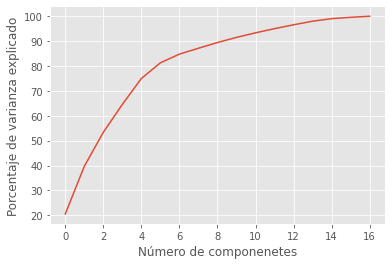

In [ ]:
# Si representamos la varianza en función del número de componentes podemos observar
# cuál es el mínimo número de componenetes que necesitaremos para explicar un cierto
# porcentaje de la varianza
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Número de componenetes")
plt.ylabel("Porcentaje de varianza explicado")

In [ ]:
# Vemos que con menos de la MITAD de las variables podemos explicar el 85% de la variaza
n_var = np.cumsum(pca.explained_variance_ratio_ * 100)[6]
print("Varianza 6 primeras componenetes:", n_var)

<IPython.core.display.Javascript object>

Varianza 6 primeras componenetes: 84.77018415461889


In [ ]:
# Alternativamente, podemos construir el conjunto que acomode el 95% de la variaza 
# del siguiente modo
pca_95 = PCA(n_components=0.95, random_state=2020)
pca_95.fit(df_s)
X_pca_95 = pca_95.transform(df_s)

<IPython.core.display.Javascript object>

In [ ]:
# Finalmente podemos crear un nuevo marco de datos con el resultado del análisis PCA
cols = ['PCA' + str(i) for i in range(12)]
df_pca = pd.DataFrame(X_pca_95, columns=cols)
print("Datos (PCA - 95%):\n", df_pca)

<IPython.core.display.Javascript object>

Datos (PCA - 95%):
           PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7      PCA8      PCA9     PCA10     PCA11
0    -0.396122  0.158113 -0.433426  0.212828 -0.892755  0.125431 -0.378146  0.041322  0.155170  0.039288 -0.112368  0.284435
1     0.760447  0.482961  0.509452 -0.527956  0.286823 -0.255352 -0.229764  0.041264 -0.273789 -0.103289  0.130383  0.007164
2     0.473962 -0.413996  0.396325 -0.530947 -0.672145 -0.289445 -0.082902  0.276360  0.061317 -0.152047 -0.282587  0.147946
3    -0.680978  0.694534 -0.356720 -0.279035 -0.261376  0.047601  0.331617 -0.316709 -0.009652  0.035543 -0.021477 -0.019886
4     0.379318  0.587639 -0.397569  0.679178 -0.497994  0.163464 -0.305562  0.162321 -0.190836 -0.117077 -0.025246 -0.009795
...        ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...
7183  0.391730 -0.130466  0.450950 -0.169702  0.993373  0.300035 -0.083700  0.017922 -0.296566 -0.082124 

In [ ]:
#Estas son las variables que más explican del modelo con PCA
df_pca.columns

<IPython.core.display.Javascript object>

Index(['PCA0', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11'], dtype='object')

In [ ]:
#algo curioso es que si cogemos los datos en bruto, sin tratarlos, se consigue
#Explicar el modelo con muy pocas variables
features=df.columns
Fea=df[features]
pca2=PCA(0.98, random_state=2020)
pca2.fit(Fea)

X_pca2=pca2.transform(X)
plt.plot(np.cumsum(pca2.explained_variance_ratio_*100))
plt.xlabel("Número de componenetes")
plt.ylabel("Porcentaje de varianza explicado")


<IPython.core.display.Javascript object>

NameError: ignored

**APARTADO 5.** Partiendo de esta submuestra final, genera los grupos de entrenamiento y validación e imprime por pantalla alguna características del mismo.

**CLASIFICADORES**

A lo largo de este apartado se emplea diferentes clasificadores para el modelo y se muestran los resultados observados, por ello, es como si se une los apartados 5, 6 y 7 todos en uno mismo. Espero que no haya ningún inconveniente.

In [ ]:
#particion de los datos de entrenamiento/test. dentro de la de entrenamiento se hace una particion adicional
#para hacer una validacion interna.
#particion datos entrenamiento/test y dentro de entrenamiento una parte es para validacion y se coge un 80% para entrenamiento
#y para test un 20%
X=df_s.drop(['TenYearCHD'], axis=1)
y=df_s[['TenYearCHD']]

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

classifiers= [("LR", LogisticRegression()),
              ("KNN", KNeighborsClassifier()),
              ("SVC",SVC()),
              ("CART",DecisionTreeClassifier()),
              ("RF", RandomForestClassifier()),
              ("Adaboost", AdaBoostClassifier()),
              ("GBM", GradientBoostingClassifier())  #el más complicado y mejor
              ]

for name, classifier in classifiers: #hago una validación cruzada interna
  cv_results= cross_validate(classifier,
                             X_train,
                             y_train,
                             cv=5,
                             scoring= ["roc_auc"])
  
  #dentro del 80% me crea un subgrupo al azar
  print(f"AUC: {round(cv_results['test_roc_auc'].mean(),7)}({name})")

<IPython.core.display.Javascript object>

AUC: 0.7285432(LR)
AUC: 0.8347722(KNN)
AUC: 0.7559441(SVC)
AUC: 0.8971131(CART)
AUC: 0.9893665(RF)
AUC: 0.7411469(Adaboost)
AUC: 0.8002131(GBM)


Según esta particióm el RF sería el mejor clasificador, aunque hay otros como KNN, CART o GBM que también lo harían genial.

In [ ]:
#Se hace un ajuste de los hiperparámetros.

Se utiliza ahora GBM

In [ ]:
#Hiperparámetro de tuning
from pandas.core.common import random_state
gbm_model=GradientBoostingClassifier(random_state=17)
gbm_params={"learning_rate": [0.3,0.5],
            "max_depth": [3,8],
            "n_estimators": [500,1000],
            "subsample":[1,0.5,0.7]}

gbm_best_grid=GridSearchCV(gbm_model,
                           gbm_params,
                           cv=5,
                           n_jobs=-1,
                           verbose=True).fit(X,y)

gbm_final=gbm_model.set_params(**gbm_best_grid.best_params_,random_state=17).fit(X,y)
rmse=np.mean(np.sqrt(-cross_val_score(gbm_final, X,y, cv=10, scoring="neg_mean_squared_error")))  

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
cv_results2=cross_validate(gbm_final,X,y,cv=5, scoring=["accuracy","f1", "roc_auc"])

<IPython.core.display.Javascript object>

In [ ]:
cv_results2
#estaria bien que los valores de roc_auc estén por encima del 95%

<IPython.core.display.Javascript object>

{'fit_time': array([8.68994498, 7.91574717, 7.87496424, 9.24485207, 7.97413921]),
 'score_time': array([0.07133794, 0.07023478, 0.0695684 , 0.06956935, 0.06949878]),
 'test_accuracy': array([0.98052851, 0.96801113, 0.96940195, 0.98260264, 0.97494781]),
 'test_f1': array([0.98076923, 0.96875   , 0.96961326, 0.98279422, 0.97534247]),
 'test_roc_auc': array([0.99762071, 0.9984699 , 0.99075365, 0.9975864 , 0.99913025])}

In [ ]:
#IMPORTANCIA VARIABLES
def plot_importance(model, features, num=len(X), save=False):
  feature_imp=pd.DataFrame({"Value":model.feature_importances_,
                            "Feature":features.columns})
  
  plt.figure(figsize=(10,10))
  sns.set(font_scale=1)
  sns.barplot(x="Value",
              y="Feature",
              data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
  
  plt.title("Features")
  plt.tight_layout()
  plt.show()

  if save:
    plt.savefig("importances.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

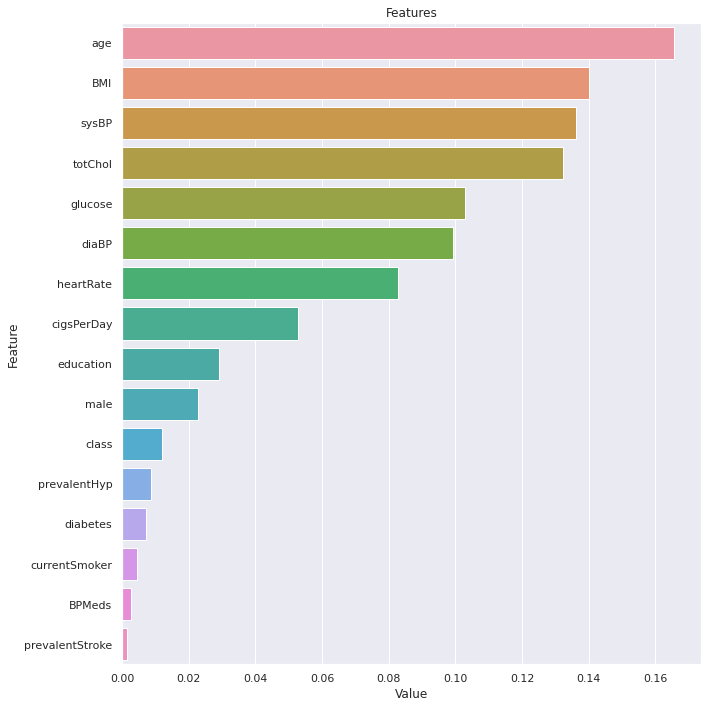

In [ ]:
plot_importance(gbm_final,X)



**Árboles de decision**

In [ ]:
# Construimos un Dataframe que sólo incluya las columnas seleccionadas 
s_cols = df.columns[lc_cols]
df_t = df[s_cols]
print("Variables seleccionadas:", len(df_t.columns))
print("De un total de:", len(df_s.columns))
print("Dataset final:", df_t)

<IPython.core.display.Javascript object>

Variables seleccionadas: 17
De un total de: 17
Dataset final:       male   age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  class
0      1.0  39.0        4.0          0.0           0.0     0.0          0.0              0.0        0.0    195.0  106.0   70.0  26.97       80.0     77.0         0.0      0
1      0.0  46.0        2.0          0.0           0.0     0.0          0.0              0.0        0.0    250.0  121.0   81.0  28.73       95.0     76.0         0.0      1
2      1.0  48.0        1.0          1.0          20.0     0.0          0.0              0.0        0.0    245.0  127.5   80.0  25.34       75.0     70.0         0.0      1
3      0.0  61.0        3.0          1.0          30.0     0.0          0.0              1.0        0.0    225.0  150.0   95.0  28.58       65.0    103.0         1.0      1
4      0.0  46.0        3.0          1.0          23.0     0.0          0

In [ ]:
# Tras depurar nuestro dataset podemos proceder a crear los conjuntos de 
# entrenamiento y prueba

# Usaremos la función de Scikit-learn para configurar los conjuntos de entrenamiento
# y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Veámos cuál es la forma de estos arrays
print(" - X_train:", X_train.shape)
print(" - X_test:", X_test.shape)
print(" - y_train:", y_train.shape)
print(" - y_test:", y_test.shape)

<IPython.core.display.Javascript object>

 - X_train: (5750, 16)
 - X_test: (1438, 16)
 - y_train: (5750, 1)
 - y_test: (1438, 1)


In [ ]:
#ARBOL DE DECISIÓN

In [ ]:
# Es hora de configurar nuestro clasificador y ajustar el modelo a los datos
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=4)
clf_dt.fit(X_train, y_train)

<IPython.core.display.Javascript object>

DecisionTreeClassifier(max_depth=4)

In [ ]:
# Ajustado el modelo vamos a evaluar su desempeño
# Calculamos las predicciones del modelo entrenado sobre el conjunto de prueba
y_test_pred = clf_dt.predict(X_test)
# Utilizando las etiquetas verdaderas en el conjunto de pruba, calculamos la
# precisión del modelo
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_test_pred) * 100
print("La precisión del modelo es de: {:0.2f}".format(acc))  

<IPython.core.display.Javascript object>

La precisión del modelo es de: 64.81


<IPython.core.display.Javascript object>

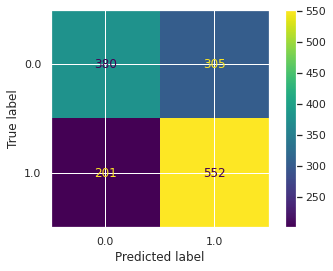

In [ ]:
# Veámos ahora la matriz de confusión para obtener una mejor valoración del
# desempeño. 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred) 

MODELO DE REGRESIÓN LOGÍSTICA

In [ ]:
# Simplemente hemos de importar el modelo adecuado y aplicarlo sobre los datos preparados
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_test_pred = clf_lr.predict(X_test)

acc = accuracy_score(y_test, y_test_pred) * 100
print("La precisión del modelo (LogReg) es de: {:0.2f}".format(acc))

<IPython.core.display.Javascript object>

La precisión del modelo (LogReg) es de: 68.08


<IPython.core.display.Javascript object>

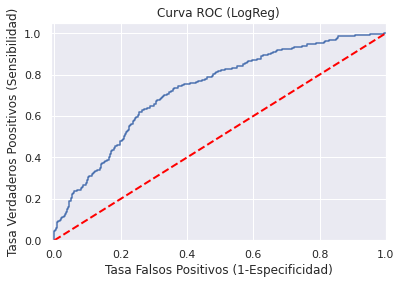

In [ ]:
#CURVA ROC

# Exploramos ahora la forma de la curva ROC
from sklearn.metrics import roc_curve
# Calculamos los valores de probabilidad asginados por el modelo sobre el conunto
# de prueba 
y_score = clf_lr.predict_proba(X_test)
# Y obtenemos la tasa de falsos positivos y verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
# La curva ROC representa la relación entre ambas métricas
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Curva ROC (LogReg)')
plt.xlabel('Tasa Falsos Positivos (1-Especificidad)')
plt.ylabel('Tasa Verdaderos Poositivos (Sensibilidad)')
plt.grid(True)

MODELO DE REGRESIÓN LINEAL

In [ ]:
from sklearn.model_selection import train_test_split
# Las características que vamos a analizar son las seleccionados con PCA
pca_features = df_pca.columns
X = df_pca[pca_features]
y = df_s['TenYearCHD']

# Usamos la funcion propia de sklearn para dividir los datos para
# entrenamiento y prueba  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

<IPython.core.display.Javascript object>

X_train: (5031, 12)
X_test: (2157, 12)
y_train: (5031,)
y_test: (2157,)


In [ ]:
# Exponemos el conjunto de entrenamiento al modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

<IPython.core.display.Javascript object>

LinearRegression()

In [ ]:
# Para obtener descriptores del ajuste utilizamos funciones de Sci-kit learn y
# calculamos las predicciones del modelo sobre el conjunto de prueba

from sklearn import metrics
y_pred = lm.predict(X_test)

evar = metrics.explained_variance_score(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred) 
mse = metrics.mean_squared_error(y_test, y_pred) 

print('- Varianza explicada: ', round(evar, 2))    
print("- R2:", round(r2, 2))
print('- MAE: ', round(mae, 4))
print('- MSE: ', round(mse,4))
print('- RMSE: ', round(np.sqrt(mse), 4))

<IPython.core.display.Javascript object>

- Varianza explicada:  1.0
- R2: 1.0
- MAE:  0.0059
- MSE:  0.0001
- RMSE:  0.008


<IPython.core.display.Javascript object>

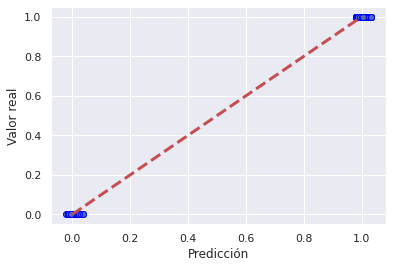

In [ ]:
# Finalmente representamos la recta de regresión del modelo
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor real')
plt.show()

Random Forest

In [ ]:
# Tras depurar nuestro dataset podemos proceder a crear los conjuntos de 
# entrenamiento y prueba
X=df_s.drop(['TenYearCHD'], axis=1)
y=df_s[['TenYearCHD']]
# Usaremos la función de Scikit-learn para configurar los conjuntos de entrenamiento
# y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)
# Veámos cuál es la forma de estos arrays
print(" - X_train:", X_train.shape)
print(" - X_test:", X_test.shape)
print(" - y_train:", y_train.shape)
print(" - y_test:", y_test.shape)

<IPython.core.display.Javascript object>

 - X_train: (5391, 16)
 - X_test: (1797, 16)
 - y_train: (5391, 1)
 - y_test: (1797, 1)


In [ ]:
X_test_rf_up=X_test
y_test_rf_up=y_test

<IPython.core.display.Javascript object>

n_estimators: número de árboles incluidos en el modelo

max_features: numero de predictores considerados en cada división. Puede ser:
  -'auto': utiliza todos los predictores

max_depth: profundidad máxima que pueden alcanzar los árboles

random state: semilla para que slos resultados sean reproducibles. Tiiene que ser un valor entero.

In [ ]:
hyperp={'n_estimators':[100,150],
        'max_features': ["auto"],
        'max_depth':[5,10],
        'criterion':['gini', 'entropy']
        }

#Búsqueda por grid search con validación cruzada
#======================================================================
rf_up=GridSearchCV(estimator=RandomForestClassifier(random_state=123),
                   param_grid=hyperp,
                   scoring='roc_auc',
                   n_jobs=-1,
                   cv=10,
                   refit=True,
                   verbose=0,
                   return_train_score=True
                   )


rf_up.fit(X_train,np.ravel(y_train)) #Se hace el entrenamiento

#Vamos a hacer validación cruzada, la haremos con 5 o con 10.
#el refit es para hacer un entrenamiento final con esos valores para obtener el mejor modelo

<IPython.core.display.Javascript object>

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'max_features': ['auto'], 'n_estimators': [100, 150]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print(rf_up.best_params_)

print(rf_up.best_score_, rf_up.scoring)

<IPython.core.display.Javascript object>

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 150}
0.9564916545788293 roc_auc


In [ ]:
modelo_final=rf_up.best_estimator_

print(modelo_final)

modeloFinalRfUp=modelo_final


<IPython.core.display.Javascript object>

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=123)


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#function to plot the ROC curve

def get_roc_curve(X_train, y_train, X_test, y_test, model):
  probs=model.predict_proba(X_test)
  #Keep probabilities for the positive outcome only
  probs=probs[:,1]
  #Calculate AUC
  auc=roc_auc_score(y_test,probs)

  #print('AUC: %3f' %auc)
  #calculate roc curve
  fpr,tpr,thresholds=roc_curve(y_test,probs)
  #plot no skill
  plt.plot([0,1],[0,1],linestyle='--', color="red")
  #plot the precision-recall curve for the model
  plt.plot(fpr,tpr,marker='.',color='blue',label='Roc curve (AUC=%0.2f' %auc)
  plt.xlabel('False Positive Rate', fontsize=10)
  plt.ylabel('True Positive Rate', fontsize=10)
  plt.title('ROC for %s'%model, fontsize=10)
  plt.legend(loc='lower right', fontsize=10)

  #show the plot
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

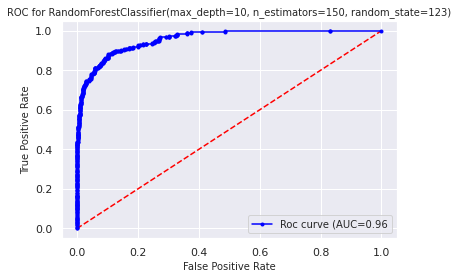

In [ ]:
#get the curve
get_roc_curve(X_train, y_train, X_test, y_test, modelo_final)

In [ ]:
from sklearn import metrics
#obtenemos la matriz de confusion

preds=modelo_final.predict(X=X_test)

print("Accuracy: ", round(metrics.accuracy_score(y_true=preds, y_pred=np.ravel(y_test)),2))
print("Precision: ", round(metrics.precision_score(y_true=preds, y_pred=np.ravel(y_test)),2))
print("Recall: ", round(metrics.recall_score(y_true=preds, y_pred=np.ravel(y_test)),2))
print("F1: ", round(metrics.f1_score(y_true=preds, y_pred=np.ravel(y_test)),2))

print("Confusion matrix: \n", confusion_matrix(y_test,preds))

<IPython.core.display.Javascript object>

Accuracy:  0.87
Precision:  0.91
Recall:  0.83
F1:  0.87
Confusion matrix: 
 [[743 163]
 [ 77 814]]


<IPython.core.display.Javascript object>

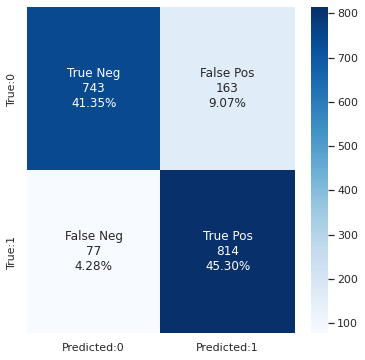

In [ ]:
#matriz de confusion de mejor forma
from numpy.ma.core import reshape
preds=modelo_final.predict(X_test)

cm=confusion_matrix(y_true=y_test,
                    y_pred=preds)
plt.figure(figsize=(6,6))

conf_matrix=pd.DataFrame(data=cm,
                         columns=['Predicted:0','Predicted:1'],
                         index=['True:0','True:1'])

group_names=["True Neg", "False Pos", "False Neg", "True Pos"]

group_counts=["{0:0.0f}".format(value) for value in np.ravel(conf_matrix)]

group_percentages=["{0:.2%}".format(value) for value in np.ravel(conf_matrix)/np.sum(np.ravel(conf_matrix))]

labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_matrix,
            annot=labels,
            fmt="",
            cmap='Blues');
        

In [ ]:
#Importancia por pureza de nodos

#vamos a crear el área roc, vamos a mirar cuanto vale el área de debajo de la curva
#Intentaremos poner un límite por encima de 0,90 de sensibilidad. Del área de debajo de la roc
#es un 0,99 y queremos que los FN y los FP se acerquen lo máximo posible a cero y ver en que valor queremos fijarlo.

importancia_predictores=pd.DataFrame(
                          {'Feature': X_train.columns,
                           'Importance': modelo_final.feature_importances_}
                          )


importancia_predictores.sort_values('Importance', ascending=False)

#Hay que poner que tenga una importancia por encima de X

<IPython.core.display.Javascript object>

Feature  Importance
1           age    0.176431
10        sysBP    0.138051
9       totChol    0.107534
12          BMI    0.103216
11        diaBP    0.102714
14      glucose    0.089216
13    heartRate    0.083937
4    cigsPerDay    0.055526
7   prevalen...    0.035146
2     education    0.032508
0          male    0.031470
15        class    0.015050
3   currentS...    0.013565
8      diabetes    0.009622
5        BPMeds    0.004690
6   prevalen...    0.001323

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
  feature_imp=pd.DataFrame({'Importance':modelo_final.feature_importances_,
                           'Feature':features.columns })
  
  plt.figure(figsize=(5,5))
  sns.set(font_scale=1)
  sns.barplot(x="Importance",
              y="Feature",
              data=feature_imp.sort_values(by="Importance",ascending=False)[0:num])
  
  plt.title("Features")
  plt.tight_layout()
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

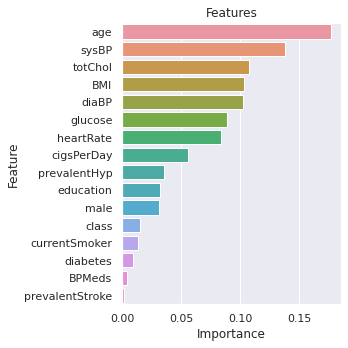

In [ ]:
plot_importance(modelo_final,X)

**GRADIENT BOOSTING**

In [ ]:
X_test_gb_up=X_test
y_test_gb_up=y_test

<IPython.core.display.Javascript object>

In [ ]:
#Grid de hiperparámetros evaluados
#==================================================================
hyperp={'max_features'  :['auto'],
        'max_depth'     :[1,2,3,4,5,6,7,8,9,10],
        'learning_rate' :[0.01,0.1] #Hay que aumentarlo, sino hay sobreentrenamiento
        }

#Búsqueda por grid search con validación cruzada
#===================================================================

gb_up=GridSearchCV(
    estimator=GradientBoostingClassifier(
        n_estimators=1000,
        random_state=123,
        validation_fraction=0.1,
        n_iter_no_change=5,
        tol=0.0001
    ),
    param_grid=hyperp,
    scoring='roc_auc',
    n_jobs=-1,
    cv=10,
    refit=True,
    verbose=0,
    return_train_score=True
    )


gb_up.fit(X=X_train,y=np.ravel(y_train))

<IPython.core.display.Javascript object>

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(n_estimators=1000,
                                                  n_iter_no_change=5,
                                                  random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto']},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print(gb_up.best_params_)
print(gb_up.best_score_, gb_up.scoring)


<IPython.core.display.Javascript object>

{'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'auto'}
0.9881861681061095 roc_auc


In [ ]:
#Número de árboles del modelo final (early stopping)
#==================================================
print(f"Número de árboles del modelo : {gb_up.best_estimator_.n_estimators_}" )


<IPython.core.display.Javascript object>

Número de árboles del modelo : 206


In [ ]:
hyperp={'n_estimators': [100], #se puede cambiar el numero de estimadores para ajustar
        'max_features'  :['auto'],
        'max_depth'     :[10],
        'learning_rate' :[0.01]
        }
gb_up=GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=123),
    param_grid=hyperp,
    scoring='roc_auc',
    n_jobs=-1,
    cv=10,
    refit=True,
    verbose=0,
    return_train_score=True
    )


gb_up.fit(X=X_train,y=np.ravel(y_train))

<IPython.core.display.Javascript object>

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [10],
                         'max_features': ['auto'], 'n_estimators': [100]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print(gb_up.best_params_)

print(gb_up.best_score_,gb_up.scoring)

<IPython.core.display.Javascript object>

{'learning_rate': 0.01, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}
0.9592030653457695 roc_auc


In [ ]:
modelo_final=gb_up.best_estimator_

modeloFinalGbUp=modelo_final

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

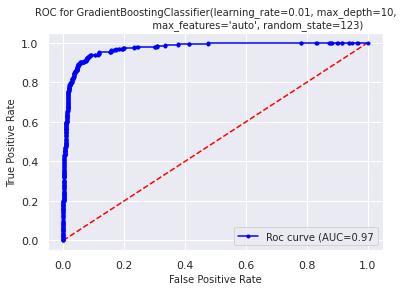

In [ ]:
get_roc_curve(X_train, y_train, X_test, y_test, modelo_final)

In [ ]:
preds=modelo_final.predict(X=X_test)

print("Accuracy: ", round(metrics.accuracy_score(y_true=preds, y_pred=np.ravel(y_test)),2))
print("Precision: ", round(metrics.precision_score(y_true=preds, y_pred=np.ravel(y_test)),2))
print("Recall: ", round(metrics.recall_score(y_true=preds, y_pred=np.ravel(y_test)),2))
print("F1: ", round(metrics.f1_score(y_true=preds, y_pred=np.ravel(y_test)),2))

print("Confusion matrix: \n", confusion_matrix(y_test,preds))


<IPython.core.display.Javascript object>

Accuracy:  0.89
Precision:  0.97
Recall:  0.84
F1:  0.9
Confusion matrix: 
 [[742 164]
 [ 30 861]]


<IPython.core.display.Javascript object>

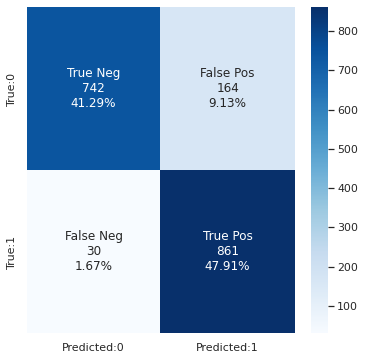

In [ ]:
preds=modelo_final.predict(X_test)

cm=confusion_matrix(y_true=y_test,
                    y_pred=preds)
plt.figure(figsize=(6,6))

conf_matrix=pd.DataFrame(data=cm,
                         columns=['Predicted:0','Predicted:1'],
                         index=['True:0','True:1'])

group_names=["True Neg", "False Pos", "False Neg", "True Pos"]

group_counts=["{0:0.0f}".format(value) for value in np.ravel(conf_matrix)]

group_percentages=["{0:.2%}".format(value) for value in np.ravel(conf_matrix)/np.sum(np.ravel(conf_matrix))]

labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_matrix,
            annot=labels,
            fmt="",
            cmap='Blues');

<IPython.core.display.Javascript object>

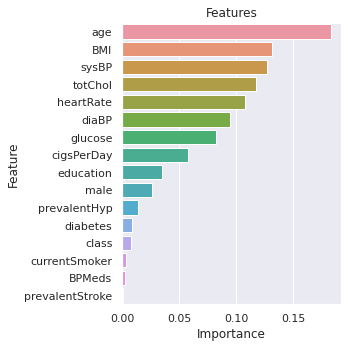

In [ ]:
plot_importance(modelo_final,X)

In [ ]:
probs_rf_up=modeloFinalRfUp.predict_proba(X_test_rf_up)
probs_rf_up=probs_rf_up[:,1]


probs_gb_up=modeloFinalGbUp.predict_proba(X_test_gb_up)
probs_gb_up=probs_gb_up[:,1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

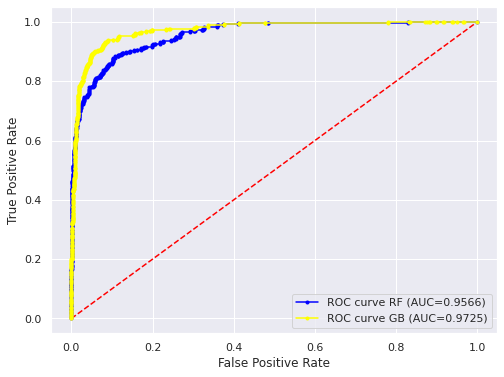

In [ ]:
#Comparamos las dos cruvas ROC, la de RF y la de GB
rf_fpr , rf_tpr,_ = roc_curve (y_test_rf_up, probs_rf_up)
gb_fpr, gb_tpr,_ = roc_curve (y_test_gb_up, probs_gb_up)



plt.figure(figsize=(8,6))


auc_rf_up=roc_auc_score(y_test_rf_up,probs_rf_up)
auc_gb_up=roc_auc_score(y_test_gb_up,probs_gb_up)


plt.plot([0,1],[0,1],linestyle='--', color="red")
plt.plot(rf_fpr, rf_tpr, marker='.', color="blue",label='ROC curve RF (AUC=%0.4f)'%auc_rf_up)
plt.plot(gb_fpr, gb_tpr, marker='.', color="yellow",label='ROC curve GB (AUC=%0.4f)'%auc_gb_up)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

En cuanto a los resultados que se han obtenido, no me terminan de convencer. No obstante, como no se pide hacer una análisis exhaustivo de los datos, no los he analizado ni mencionado más en concreto. Simplemente me he limitado a escribir el código de lo que se pedía, creo que está todo. Cualquier cosa que pueda mejorar, me vendría muy bien.
Muchas gracias por todo, y lo dicho, creo que he puesto todo lo que se me pedía.